### Build Random Forest and Linear Regression models

In [1]:
# install.packages("tidyverse") 
# install.packages("dplyr") 
# install.packages("randomForest") 
# install.packages("caret") 
# install.packages("rpart")
# install.packages("Metrics")
# install.packages("grid") 
# install.packages("patchwork") 
Sys.setenv(LANGUAGE = "en")

In [2]:
# Load libraries
library(tidyverse)
library(dplyr)
library(randomForest)
library(caret)
library(rpart)
library(Metrics)
library(grid)
library(glmnet)
library(patchwork)
options(repr.plot.width = 15, repr.plot.height = 11)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"package 'randomForest' was built under R version 4.3.2"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin


Warning message:
"package 'caret' was built under R version 4.3.2"
Loadi

In [3]:
# Read dataset
model_data <-
  "model_data.csv" %>%
  read_csv()

Rows: 3653 Columns: 9
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): theme_name
dbl (8): parts_count, minifigures_count, rating, retail_price, lifecycle_dur...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# Select the desired themes with highest profits
desired_themes <- c('Avatar: The Last Airbender', 'Model Team', 'Icons',
                    'Batman', 'Trains', 'The Lord of the Rings', 'Spider-Man', 
                    'Pirates of the Caribbean', 'The Simpsons', 'Pirates', 
                    'Stranger Things', 'Western', 'Indiana Jones', 
                    'The Hobbit', 'Vikings', 'FORMA', 'Discovery', 'Adventurers', 
                    'Scooby-Doo', 'Monster Fighters', 'Rock Raiders', 
                    'SpongeBob SquarePants', 'Hobby Set', 'Exo-Force',
                    'Star Wars', 'Aquazone', 'Castle', 'Studios', 'Dino Attack', 
                    'Time Cruisers', 'Bionicle')

In [5]:
# Create a new dataset to select the desired themes with highest profits
theme_data <- 
  model_data[model_data$theme_name %in% desired_themes, ]

In [6]:
# Select the retired themes
retired_themes <- c('Avatar: The Last Airbender', 'Model Team', 'Pirates of the Caribbean', 
                    'The Simpsons', 'Western', 'Indiana Jones', 'The Hobbit', 'The Lord of the Rings', 
                    'Vikings', 'FORMA', 'Discovery', 'Adventurers', 'Scooby-Doo', 'Monster Fighters', 
                    'Rock Raiders', 'SpongeBob SquarePants', 'Exo-Force', 'Dino Attack', 
                    'Time Cruisers', 'Aquazone', 'Studios', 'Bionicle')

In [7]:
# Create a variable to denote whether the set from a retired theme
theme_data <- 
  theme_data %>%
    mutate(is_from_retired_theme = ifelse(theme_name %in% retired_themes, 1, 0))

summary(theme_data)

  theme_name         parts_count     minifigures_count     rating     
 Length:783         Min.   :  12.0   Min.   : 1.000    Min.   :0.000  
 Class :character   1st Qu.: 109.0   1st Qu.: 2.000    1st Qu.:3.800  
 Mode  :character   Median : 262.0   Median : 4.000    Median :4.000  
                    Mean   : 409.7   Mean   : 3.928    Mean   :3.879  
                    3rd Qu.: 502.0   3rd Qu.: 5.000    3rd Qu.:4.200  
                    Max.   :5197.0   Max.   :24.000    Max.   :4.700  
  retail_price    lifecycle_duration days_since_launch resale_price_used
 Min.   :  2.00   Min.   :  30.0     Min.   : 121      Min.   :  2.52   
 1st Qu.: 14.99   1st Qu.: 365.0     1st Qu.:2921      1st Qu.: 26.94   
 Median : 29.99   Median : 578.0     Median :4961      Median : 56.24   
 Mean   : 46.10   Mean   : 568.1     Mean   :4978      Mean   : 95.42   
 3rd Qu.: 52.49   3rd Qu.: 729.0     3rd Qu.:7031      3rd Qu.:117.56   
 Max.   :699.99   Max.   :2677.0     Max.   :9861      Max.   :92

In [8]:
# Check how many sets from Star Wars
theme_data %>%
  filter(theme_name == "Star Wars") %>%
  glimpse()

Rows: 431
Columns: 10
$ theme_name            <chr> "Star Wars", "Star Wars", "Star Wars", "Star War…
$ parts_count           <dbl> 52, 49, 82, 93, 215, 136, 266, 179, 409, 244, 37…
$ minifigures_count     <dbl> 2, 2, 4, 3, 3, 3, 4, 4, 3, 1, 3, 10, 2, 2, 1, 2,…
$ rating                <dbl> 3.6, 3.7, 3.6, 4.1, 4.0, 3.7, 4.2, 3.7, 4.0, 3.5…
$ retail_price          <dbl> 6, 6, 10, 10, 20, 15, 30, 20, 50, 30, 50, 90, 6,…
$ lifecycle_duration    <dbl> 640, 678, 640, 671, 678, 640, 1043, 1005, 678, 6…
$ days_since_launch     <dbl> 8675, 8713, 8675, 8706, 8713, 8675, 8713, 8675, …
$ resale_price_used     <dbl> 30.41, 24.98, 23.88, 28.91, 36.34, 21.16, 62.85,…
$ resale_price_new      <dbl> 89.92, 80.04, 72.74, 98.56, 128.36, 84.07, 296.9…
$ is_from_retired_theme <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


In [9]:
# Create a variable to denote whether the set from Star Wars
theme_data$is_starwars <- 
  ifelse(theme_data$theme_name == "Star Wars", 1, 0)

head(theme_data)

theme_name,parts_count,minifigures_count,rating,retail_price,lifecycle_duration,days_since_launch,resale_price_used,resale_price_new,is_from_retired_theme,is_starwars
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Trains,842,7,4.3,130.00,943,9679,216.43,762.15,0,0
Trains,914,3,4.4,140.00,2312,9617,243.55,589.41,0,0
Castle,59,2,3.9,6.50,943,9709,78.79,213.75,0,0
Aquazone,57,1,3.6,8.75,730,9861,11.79,20.00,1,0
Aquazone,96,1,3.8,12.00,1004,9770,17.05,94.67,1,0
Aquazone,258,2,4.4,50.00,548,9679,106.77,400.00,1,0


In [10]:
# Check unique theme name
unique(theme_data$theme_name)

[1] "Trains"                     "Castle"                    
 [3] "Aquazone"                   "Pirates"                   
 [5] "Time Cruisers"              "Western"                   
 [7] "Adventurers"                "Rock Raiders"              
 [9] "Star Wars"                  "Studios"                   
[11] "Spider-Man"                 "Discovery"                 
[13] "Vikings"                    "Dino Attack"               
[15] "Bionicle"                   "SpongeBob SquarePants"     
[17] "Avatar: The Last Airbender" "Exo-Force"                 
[19] "Batman"                     "Indiana Jones"             
[21] "Pirates of the Caribbean"   "Monster Fighters"          
[23] "The Lord of the Rings"      "The Hobbit"                
[25] "The Simpsons"               "Scooby-Doo"                
[27] "Stranger Things"            "Icons"

In [11]:
# Filtered out no rating value
theme_data <-
  theme_data %>%
  filter(rating != 0) %>%
  select(-theme_name)

In [12]:
# Check the dataset
theme_data %>%
  summary()

theme_data %>%
  glimpse()

  parts_count     minifigures_count     rating       retail_price   
 Min.   :  12.0   Min.   : 1.000    Min.   :2.900   Min.   :  2.00  
 1st Qu.: 110.0   1st Qu.: 2.000    1st Qu.:3.800   1st Qu.: 14.99  
 Median : 266.5   Median : 4.000    Median :4.000   Median : 29.99  
 Mean   : 415.2   Mean   : 3.924    Mean   :3.986   Mean   : 46.57  
 3rd Qu.: 510.2   3rd Qu.: 5.000    3rd Qu.:4.200   3rd Qu.: 53.74  
 Max.   :5197.0   Max.   :24.000    Max.   :4.700   Max.   :699.99  
 lifecycle_duration days_since_launch resale_price_used resale_price_new 
 Min.   :  30.0     Min.   : 121      Min.   :  4.01    Min.   :   9.65  
 1st Qu.: 365.0     1st Qu.:2921      1st Qu.: 27.50    1st Qu.:  52.27  
 Median : 578.0     Median :4747      Median : 56.63    Median : 115.95  
 Mean   : 570.2     Mean   :4903      Mean   : 96.30    Mean   : 194.55  
 3rd Qu.: 729.0     3rd Qu.:6757      3rd Qu.:117.56    3rd Qu.: 235.37  
 Max.   :2677.0     Max.   :9861      Max.   :925.00    Max.   :9000.00  

Rows: 762
Columns: 10
$ parts_count           <dbl> 842, 914, 59, 57, 96, 258, 71, 58, 152, 237, 28,…
$ minifigures_count     <dbl> 7, 3, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 4, 10, 1, 1,…
$ rating                <dbl> 4.3, 4.4, 3.9, 3.6, 3.8, 4.4, 3.5, 3.3, 3.8, 3.9…
$ retail_price          <dbl> 130.00, 140.00, 6.50, 8.75, 12.00, 50.00, 8.75, …
$ lifecycle_duration    <dbl> 943, 2312, 943, 730, 1004, 548, 274, 913, 913, 9…
$ days_since_launch     <dbl> 9679, 9617, 9709, 9861, 9770, 9679, 9770, 9679, …
$ resale_price_used     <dbl> 216.43, 243.55, 78.79, 11.79, 17.05, 106.77, 45.…
$ resale_price_new      <dbl> 762.15, 589.41, 213.75, 20.00, 94.67, 400.00, 16…
$ is_from_retired_theme <dbl> 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ is_starwars           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


In [13]:
# Save the dataset
write.csv(theme_data, file = "theme_data_model.csv", row.names = FALSE)

### Create Function for Building Random Forest Model

In [14]:
# Filter out variable not interested
theme_data <-
  theme_data %>%
  select(-resale_price_used)

In [15]:
# Check dataset
theme_data %>%
  glimpse()

Rows: 762
Columns: 9
$ parts_count           <dbl> 842, 914, 59, 57, 96, 258, 71, 58, 152, 237, 28,…
$ minifigures_count     <dbl> 7, 3, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 4, 10, 1, 1,…
$ rating                <dbl> 4.3, 4.4, 3.9, 3.6, 3.8, 4.4, 3.5, 3.3, 3.8, 3.9…
$ retail_price          <dbl> 130.00, 140.00, 6.50, 8.75, 12.00, 50.00, 8.75, …
$ lifecycle_duration    <dbl> 943, 2312, 943, 730, 1004, 548, 274, 913, 913, 9…
$ days_since_launch     <dbl> 9679, 9617, 9709, 9861, 9770, 9679, 9770, 9679, …
$ resale_price_new      <dbl> 762.15, 589.41, 213.75, 20.00, 94.67, 400.00, 16…
$ is_from_retired_theme <dbl> 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ is_starwars           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


In [16]:
# Set categorical variables "is_starwars" and "is_from_retired_theme" as factors
theme_data$is_starwars <- as.factor(theme_data$is_starwars)
theme_data$is_from_retired_theme <- as.factor(theme_data$is_from_retired_theme)

# Set random seed
set.seed(123)
rows <- nrow(theme_data)
shuffled_indices <- sample(1:rows, rows)
train_size <- floor(0.8 * rows)                      
train_indices <- shuffled_indices[1:train_size]         # 80% as train data
test_indices <- shuffled_indices[(train_size + 1):rows] # 20% as test data

train_data <- theme_data[train_indices, ]
test_data <- theme_data[test_indices, ]

# Check data
nrow(train_data)
nrow(test_data)

[1] 609

[1] 153

In [17]:
# Create a function to train the Random Forest model using different parameters
evaluate_rf_model <- function(data, outcome_var_name, folds = 10) {
    
  # The varied parametersin the model
  ntree_values <- c(100, 200, 300, 400, 500)
  mtry_values <- 1:8
  
  # Create a dataset to save the results
  results <- expand.grid(ntree = integer(), mtry = integer(), RMSE = double(), Rsquared = double(), stringsAsFactors = FALSE)
  
  # Iterate through each parameter combination
  for (ntree in ntree_values) {
    for (mtry in mtry_values) {
        
      # Use k-fold cross validation, k is 10
      train_control <- trainControl(method = "cv", number = folds, search = "grid", savePredictions = "final")
      
      # train the random forest model
      model <- train(reformulate(".", outcome_var_name), data = data,
                     method = "rf",
                     trControl = train_control,
                     tuneGrid = data.frame(mtry = mtry),
                     ntree = ntree,
                     metric = "RMSE")
      
      # Calculate RMSE
      rmse_val <- rmse(model$pred$obs, model$pred$pred)
      
      # Calculate R-square
      rsq_val <- R2(model$pred$obs, model$pred$pred)
      
      # Save the results
      results <- rbind(results, data.frame(ntree = ntree, mtry = mtry, RMSE = rmse_val, Rsquared = rsq_val))
    }
  }
  
  return(results)
}

In [18]:
# Call the function to train a Random Forest model
first_result <- 
  evaluate_rf_model(train_data, "resale_price_new")

first_result

ntree,mtry,RMSE,Rsquared
<dbl>,<int>,<dbl>,<dbl>
100,1,149.3676,0.5853054
100,2,136.9589,0.6211771
100,3,134.8943,0.6307411
100,4,133.5781,0.6365126
100,5,130.1339,0.6553417
100,6,131.6826,0.6463042
100,7,134.3378,0.6316345
100,8,130.6495,0.6518446
200,1,146.8371,0.6084579


In [19]:
# Find the parameter combination with lowset RMSE
first_best_rmse <- 
  first_result[which.min(first_result$RMSE), ]

# Find the parameter combination with lowset R-square
first_best_rsq <- 
  first_result[which.max(first_result$Rsquared), ]

# Print the result
first_best_rmse
first_best_rsq

,ntree,mtry,RMSE,Rsquared
,<dbl>,<int>,<dbl>,<dbl>
5,100,5,130.1339,0.6553417


,ntree,mtry,RMSE,Rsquared
,<dbl>,<int>,<dbl>,<dbl>
5,100,5,130.1339,0.6553417


In [20]:
set.seed(1234)

# Train the model on the training dataset using optimal parameters ntree = 500 and mtry = 3
final_model_rf <- 
  randomForest(resale_price_new ~ ., 
               data = train_data, 
               ntree = 100, 
               mtry = 5)

# Use the final model to make predictions on the test dataset
test_predictions <- 
  predict(final_model_rf, test_data)

# alculate RMSE and R^2 on the test set
test_rmse <- 
  rmse(test_data$resale_price_new, test_predictions)
test_rsq <- 
  R2(test_predictions, test_data$resale_price_new)

# Print the results
print(paste("RMSE on test set is", test_rmse))
print(paste("R-squared on test set is:", test_rsq))

[1] "RMSE on test set is 688.97206344713"
[1] "R-squared on test set is: 0.13847546505282"


### The Analysis of Data Distribution

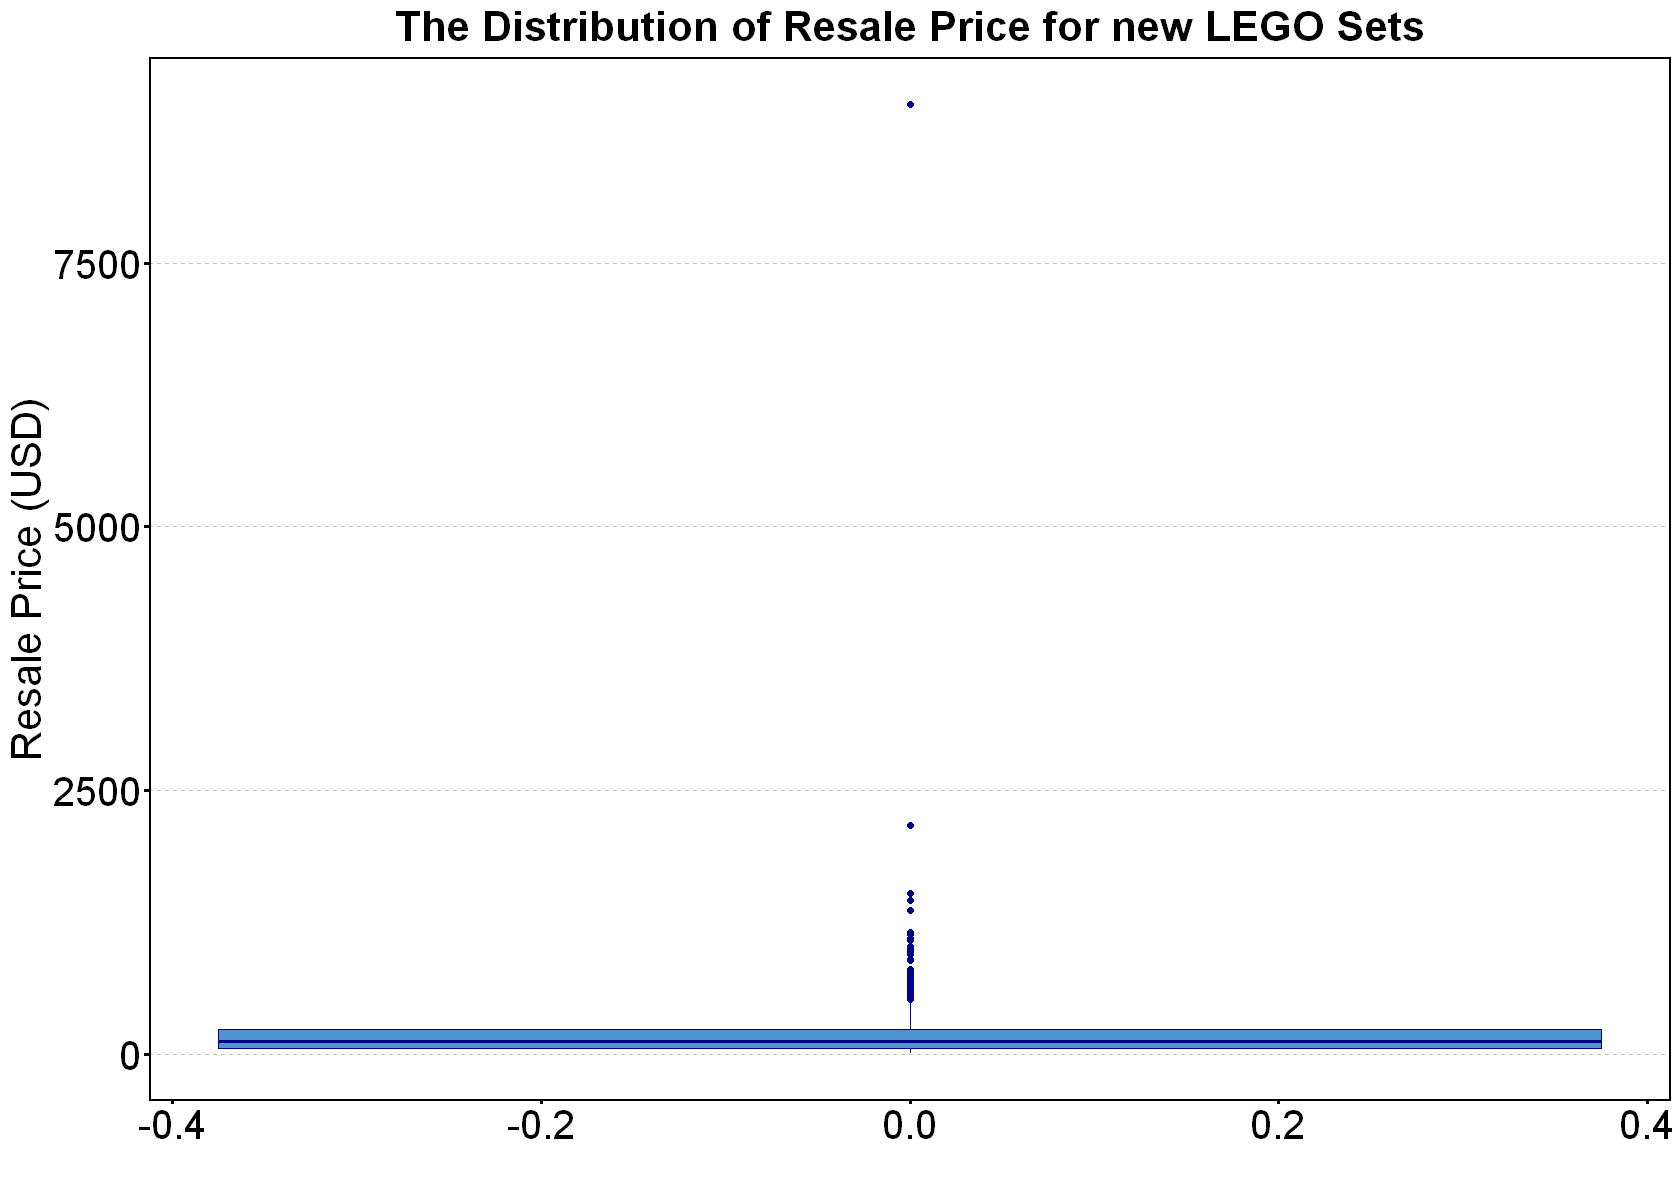

In [28]:
# Check the distribution of the target variable
price_boxplot <-
  theme_data %>%
  ggplot(aes(y = resale_price_new)) + 
  geom_boxplot(fill = "steelblue3", color = "darkblue") +
  theme_minimal() + 
  labs(title = "The Distribution of Resale Price for new LEGO Sets", 
       y = "Resale Price (USD)", 
       x = "") +
# TO beautify the plot
  theme(
    axis.title = element_text(size = 25, hjust = 0.5), 
    axis.text = element_text(size = 24, color = "black"), 
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.grid.major.y = element_line(colour = "gray", linetype = "dashed"), 
    panel.grid.minor.y = element_blank(), 
    axis.ticks = element_line(linewidth = 1), 
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1), 
    axis.line = element_line(colour = "black", linewidth = 0.5), 
    plot.title = element_text(hjust = 0.5, size = 25, face = "bold")) 

price_boxplot

In [29]:
# Save the plot above
ggsave("price_boxplot.jpg", plot = price_boxplot, width = 11, height = 8, units = "in", dpi = 300)

In [18]:
# Filter out the price greater than 9000
theme_data_clean <-
  theme_data %>%
  filter(resale_price_new < 9000)

In [19]:
summary(theme_data_clean)

  parts_count     minifigures_count     rating       retail_price   
 Min.   :  12.0   Min.   : 1.00     Min.   :2.900   Min.   :  2.00  
 1st Qu.: 110.0   1st Qu.: 2.00     1st Qu.:3.800   1st Qu.: 14.99  
 Median : 266.0   Median : 4.00     Median :4.000   Median : 29.99  
 Mean   : 414.8   Mean   : 3.92     Mean   :3.985   Mean   : 46.50  
 3rd Qu.: 508.0   3rd Qu.: 5.00     3rd Qu.:4.200   3rd Qu.: 50.00  
 Max.   :5197.0   Max.   :24.00     Max.   :4.700   Max.   :699.99  
 lifecycle_duration days_since_launch resale_price_new  is_from_retired_theme
 Min.   :  30.0     Min.   : 121      Min.   :   9.65   0:554                
 1st Qu.: 365.0     1st Qu.:2921      1st Qu.:  52.26   1:207                
 Median : 578.0     Median :4747      Median : 115.73                        
 Mean   : 570.2     Mean   :4901      Mean   : 182.98                        
 3rd Qu.: 729.0     3rd Qu.:6757      3rd Qu.: 235.16                        
 Max.   :2677.0     Max.   :9861      Max.   :216

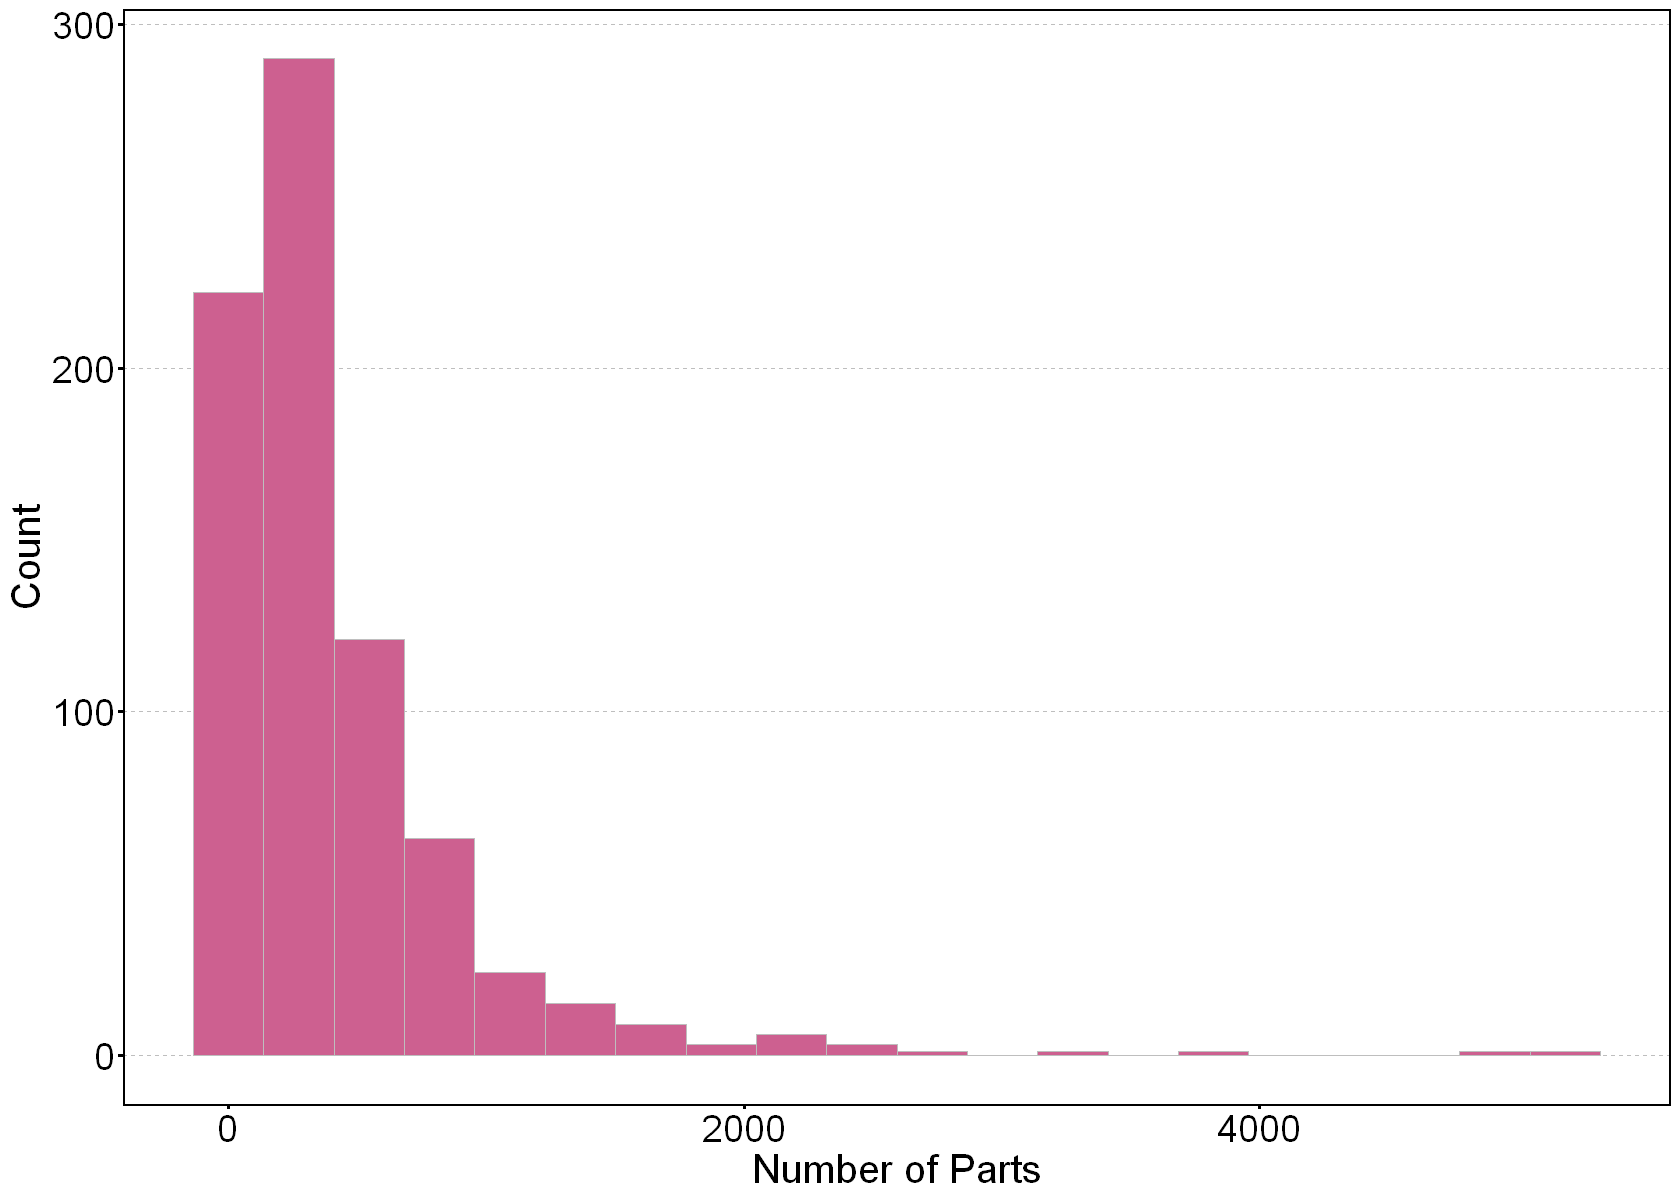

In [43]:
# Create histogram for the variable
parts_count_plot <- 
  theme_data_clean %>%
  ggplot(aes(x = parts_count)) +
  geom_histogram(bins = 20, fill = 'hotpink3', color = 'gray') +
  labs(title = "Number of Parts",
       x = "Number of Parts",
       y = "Count") +
  theme_minimal() +
  theme(
    axis.title = element_text(size =24, hjust = 0.5), 
    plot.title = element_blank(), 
    axis.text = element_text(size = 22, color = "black"), 
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.grid.major.y = element_line(colour = "gray", linetype = "dashed"), 
    panel.grid.minor.y = element_blank(), 
    axis.ticks = element_line(linewidth = 1), 
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1), 
    axis.line = element_line(colour = "black", linewidth = 0.5)) 

parts_count_plot

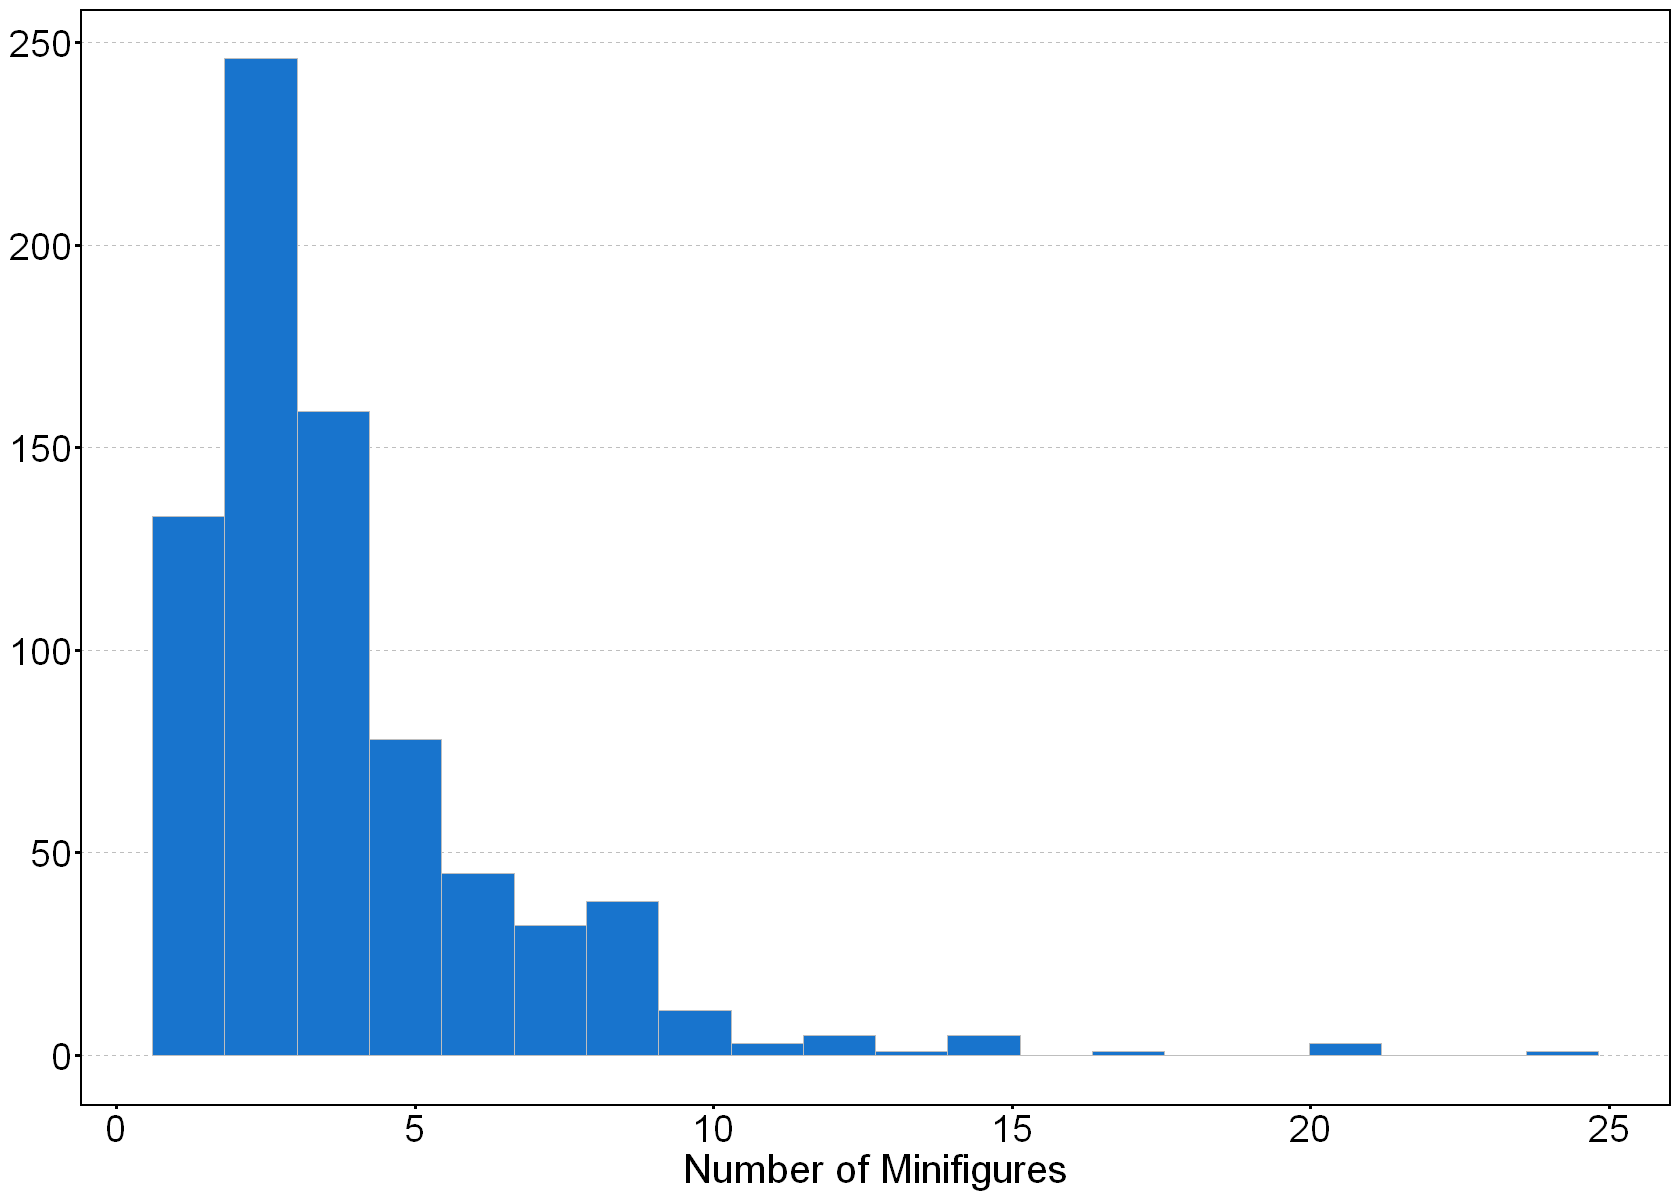

In [44]:
# Create histogram for the variable
minifigures_plot <- 
  theme_data_clean %>%
  ggplot(aes(x = minifigures_count)) +
  geom_histogram(bins = 20, fill = 'dodgerblue3', color = 'gray') +
  labs(
       x = "Number of Minifigures",
       y = "Count") +
  theme_minimal() +
  theme(
    axis.title = element_text(size = 24), 
    axis.title.y = element_blank(), # 
    axis.text = element_text(size = 22, color = "black"), 
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.grid.major.y = element_line(colour = "gray", linetype = "dashed"), 
    panel.grid.minor.y = element_blank(), 
    axis.ticks = element_line(linewidth = 1), 
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
    axis.line = element_line(colour = "black", linewidth = 0.5)) 

minifigures_plot 

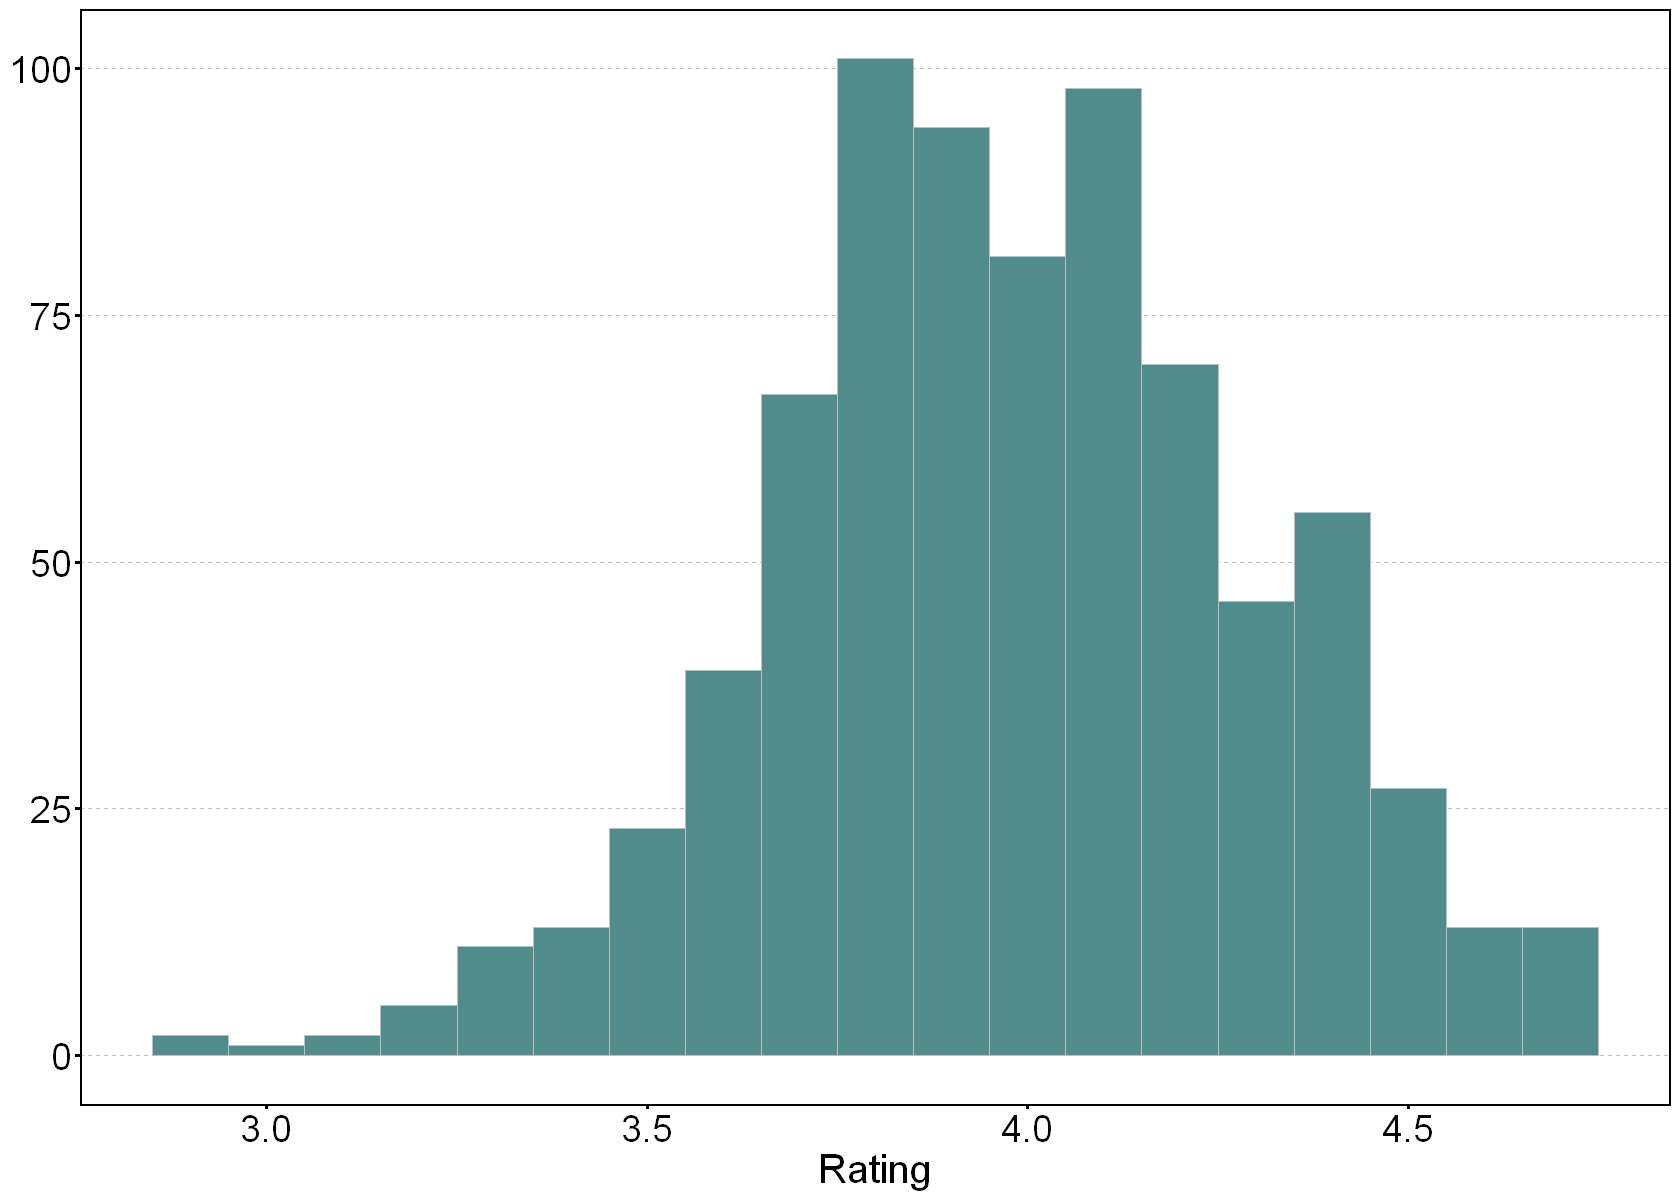

In [45]:
# Create histogram for the variable
rating_plot <- 
  theme_data_clean %>%
  ggplot(aes(x = rating)) +
  geom_histogram(bins = 19, fill = 'darkslategray4', color = 'gray') +
  labs(
       x = "Rating",
       y = "Count") +
  theme_minimal() +
  theme(
    axis.title.y = element_blank(), 
    axis.title = element_text(size = 24), 
    axis.text = element_text(size = 22, color = "black"), 
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.grid.major.y = element_line(colour = "gray", linetype = "dashed"), 
    panel.grid.minor.y = element_blank(), 
    axis.ticks = element_line(linewidth = 1), 
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
    axis.line = element_line(colour = "black", linewidth = 0.5)) 
rating_plot

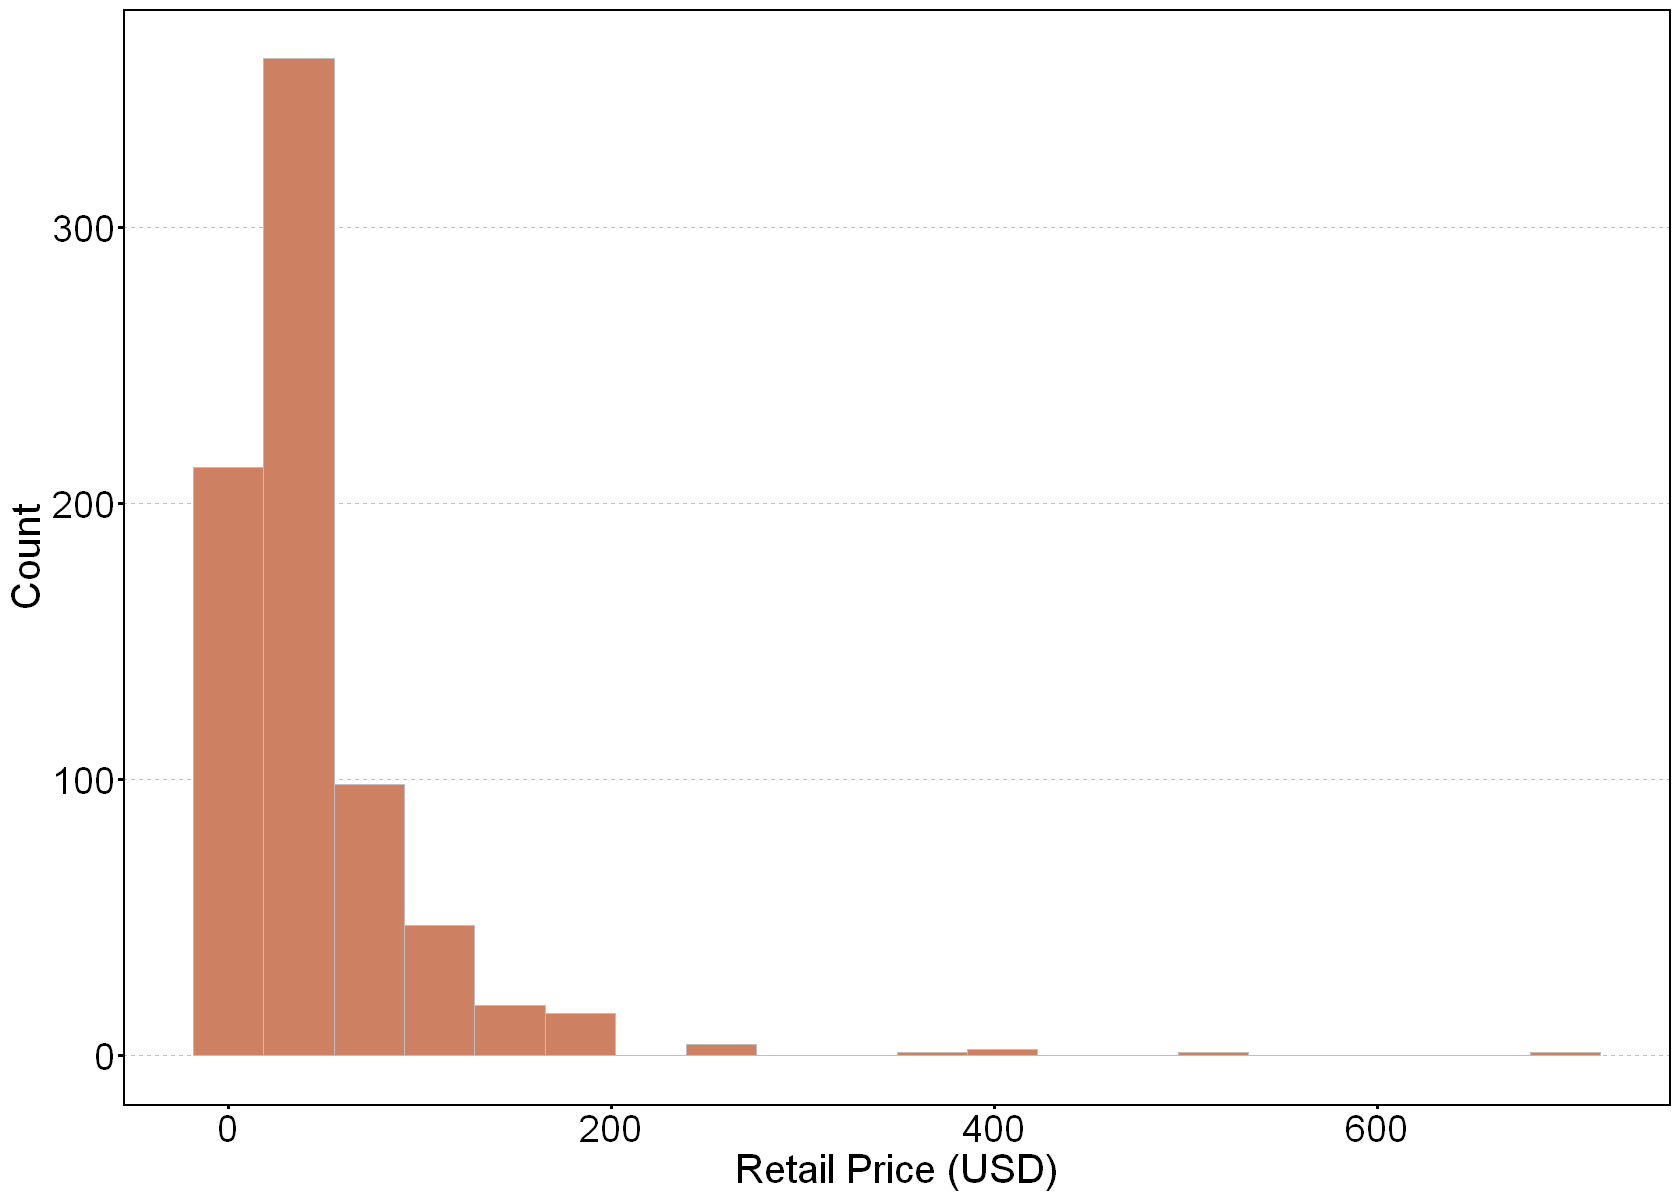

In [52]:
# Create histogram for the variable
retail_price_plot <- 
  theme_data_clean %>%
  ggplot(aes(x = retail_price)) +
  geom_histogram(bins = 20, fill = 'lightsalmon3', color = 'gray') +
  labs(
       x = "Retail Price (USD)",
       y = "Count") +
  theme_minimal() +
  theme(
    axis.text = element_text(size = 22, color = "black"), 
    axis.title = element_text(size = 24),
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.grid.major.y = element_line(colour = "gray", linetype = "dashed"), 
    panel.grid.minor.y = element_blank(), 
    axis.ticks = element_line(linewidth = 1), 
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1), 
    axis.line = element_line(colour = "black", linewidth = 0.5)) 

retail_price_plot

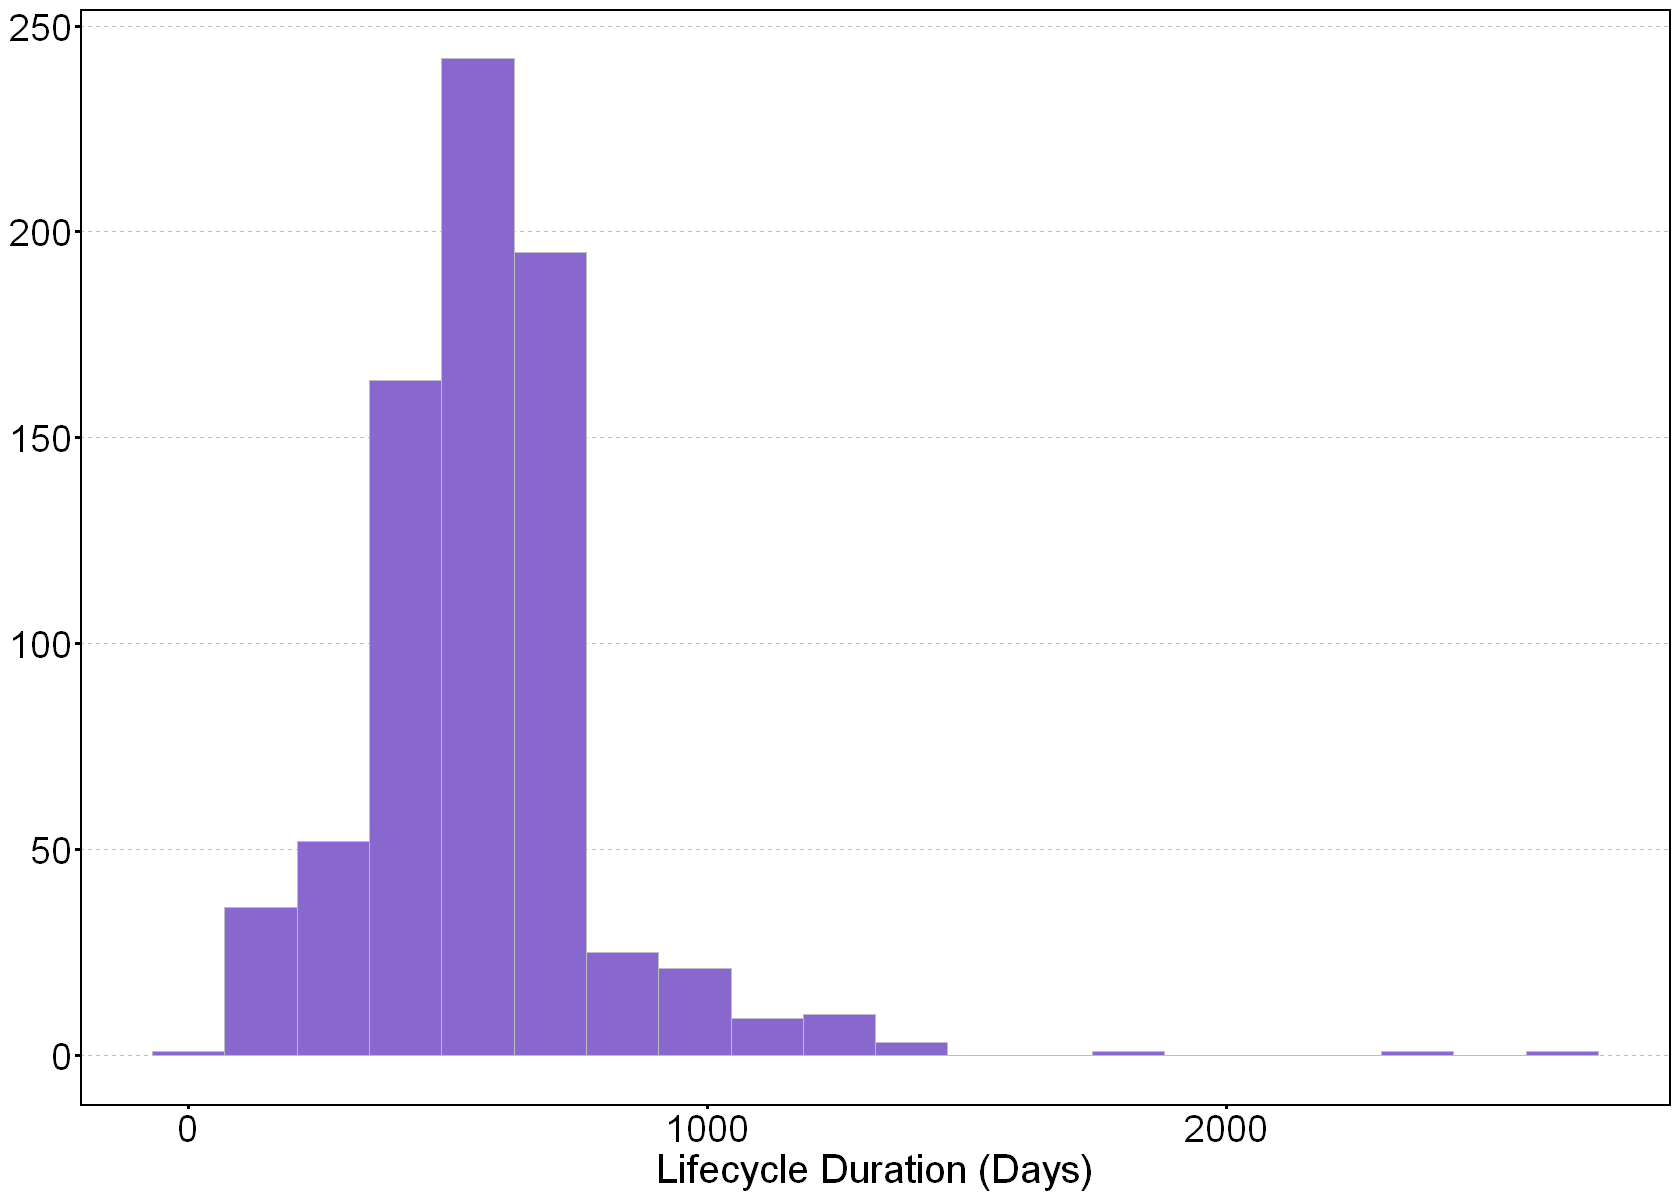

In [47]:
# Create histogram for the variable
lifecycle_plot <- 
  theme_data_clean %>%
  ggplot(aes(x = lifecycle_duration)) +
  geom_histogram(bins = 20, fill = 'mediumpurple3', color = 'gray') +
  labs(
       x = "Lifecycle Duration (Days)",
       y = "Count") +
  theme_minimal() +
  theme(
    axis.title.y = element_blank(),
    axis.title = element_text(size = 24, color = "black"), 
    axis.text = element_text(size = 22, color = "black"), 
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.grid.major.y = element_line(colour = "gray", linetype = "dashed"), 
    panel.grid.minor.y = element_blank(), 
    axis.ticks = element_line(linewidth = 1), 
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1), 
    axis.line = element_line(colour = "black", linewidth = 0.5)) 
lifecycle_plot

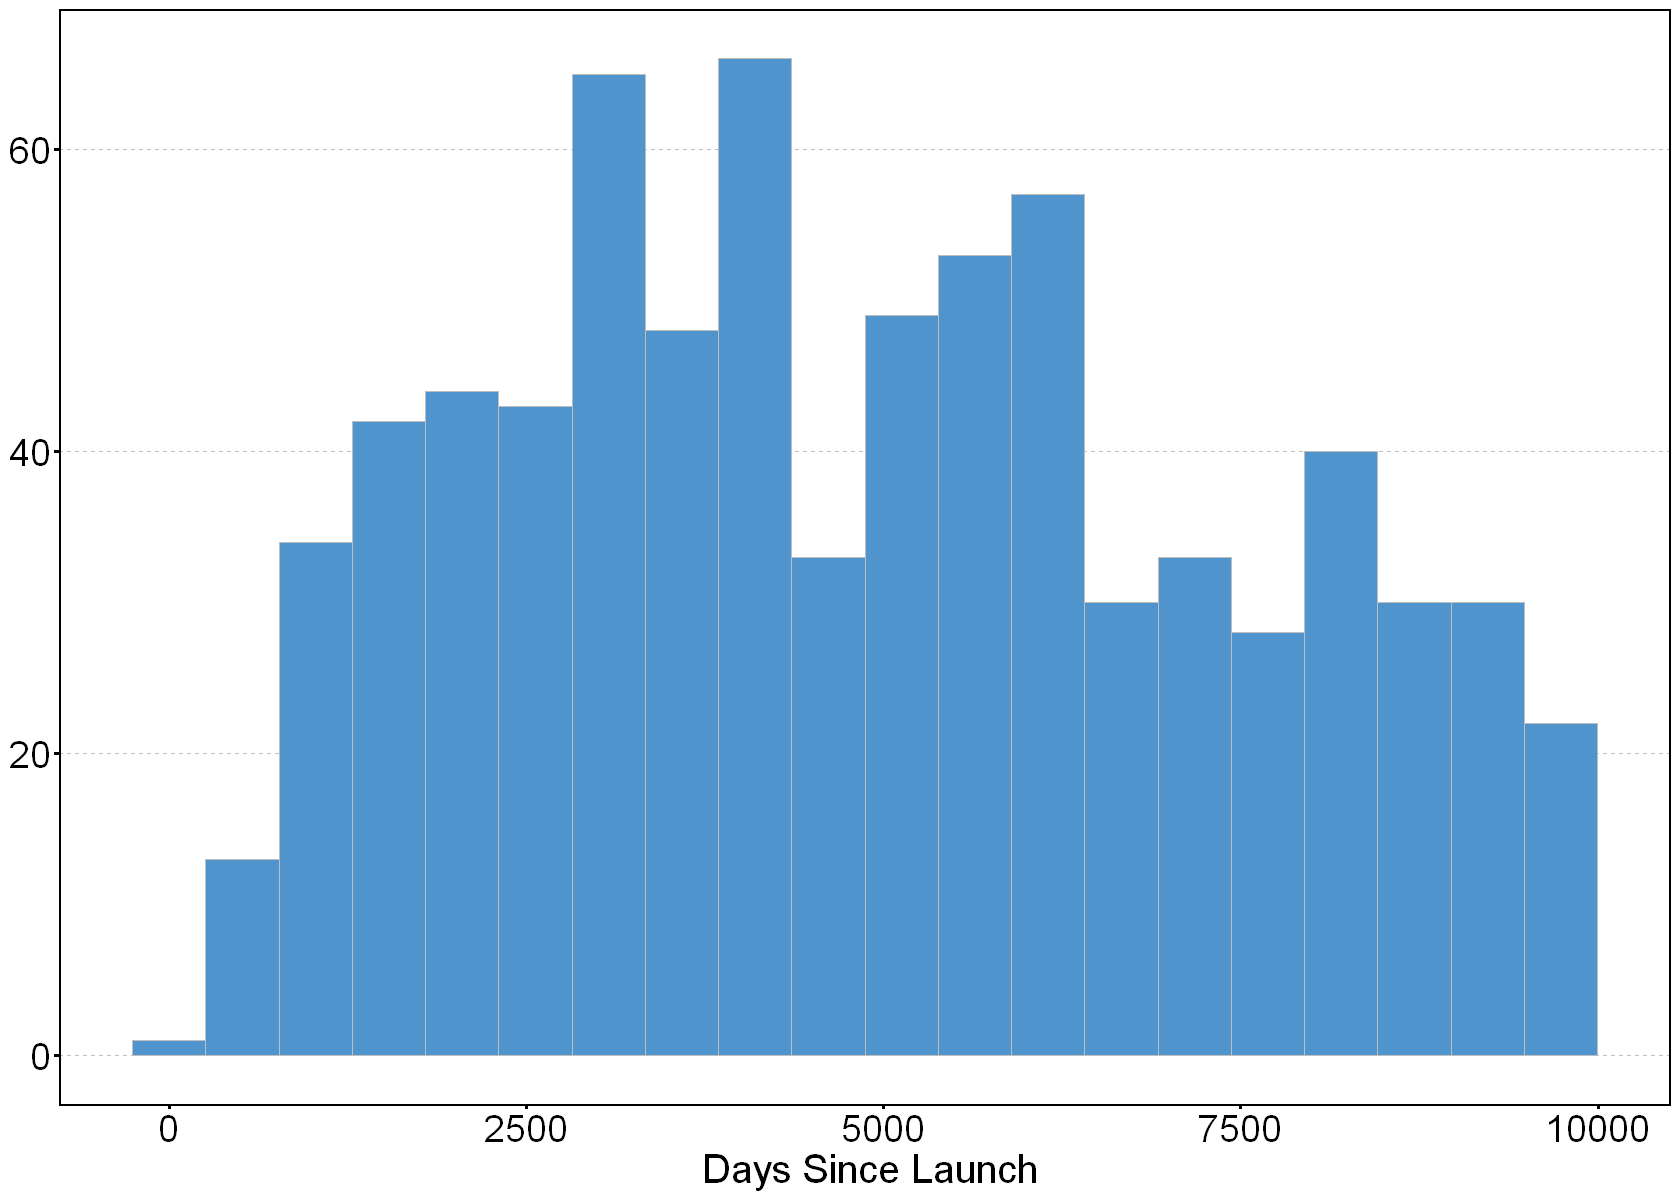

In [48]:
# Create histogram for the variable
days_since_lauch_plot <- 
  theme_data_clean %>%
  ggplot(aes(x = days_since_launch)) +
  geom_histogram(bins = 20, fill = 'steelblue3', color = 'gray') +
  labs(
       x = " Days Since Launch",
       y = "Count") +
  theme_minimal() +
  theme(
    axis.title.y = element_blank(),
    axis.text = element_text(size = 22, color = "black"), 
    axis.title = element_text(size = 24, color = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), 
    panel.grid.major.y = element_line(colour = "gray", linetype = "dashed"), 
    panel.grid.minor.y = element_blank(), 
    axis.ticks = element_line(linewidth = 1), 
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1), 
    axis.line = element_line(colour = "black", linewidth = 0.5)) 

days_since_lauch_plot

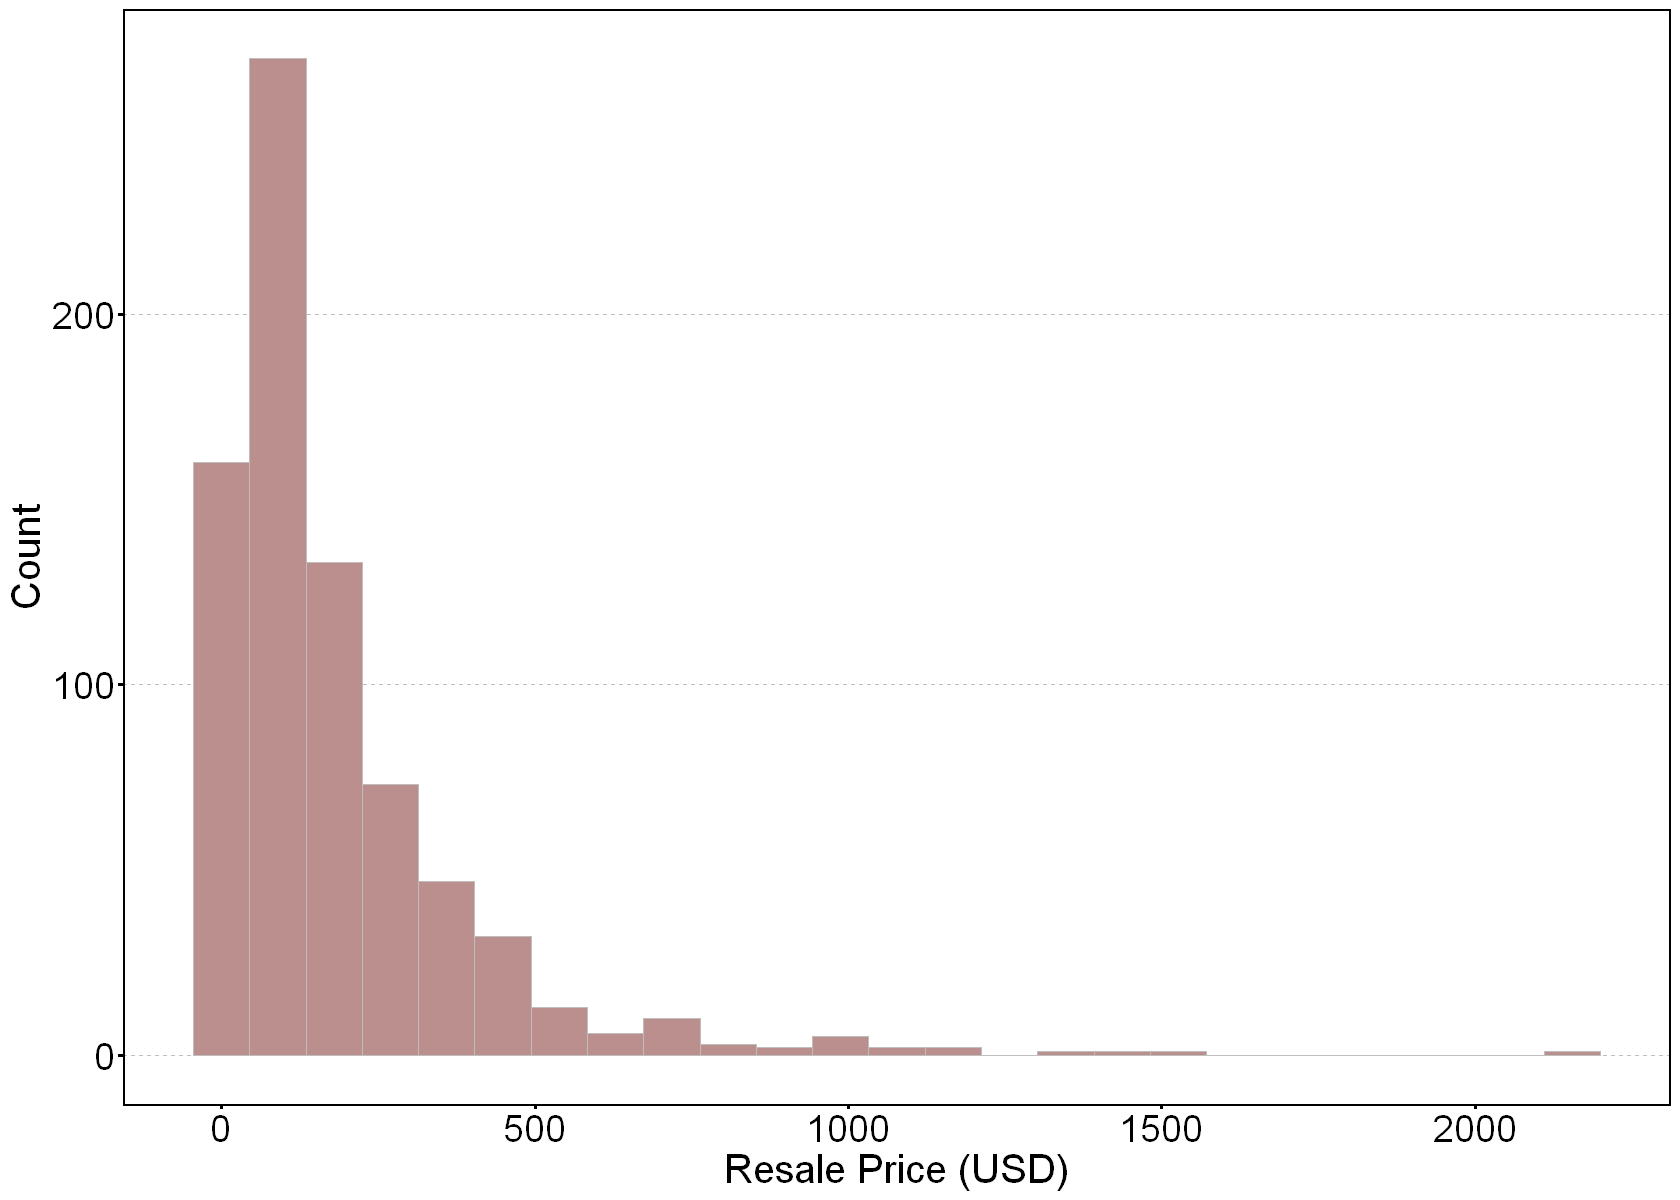

In [49]:
# Create histogram for the variable
resale_price_plot <- 
  theme_data_clean %>%
  ggplot(aes(x = resale_price_new)) +
  geom_histogram(bins = 25, fill = 'rosybrown', color = 'gray') +
  labs(
       x = "Resale Price (USD)",
       y = "Count") +
  theme_minimal() +
  theme(
    axis.text = element_text(size = 22, color = "black"), 
    axis.title = element_text(size = 24),
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.grid.major.y = element_line(colour = "gray", linetype = "dashed"), 
    panel.grid.minor.y = element_blank(), 
    axis.ticks = element_line(linewidth = 1), 
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1), 
    axis.line = element_line(colour = "black", linewidth = 0.5)) 

resale_price_plot

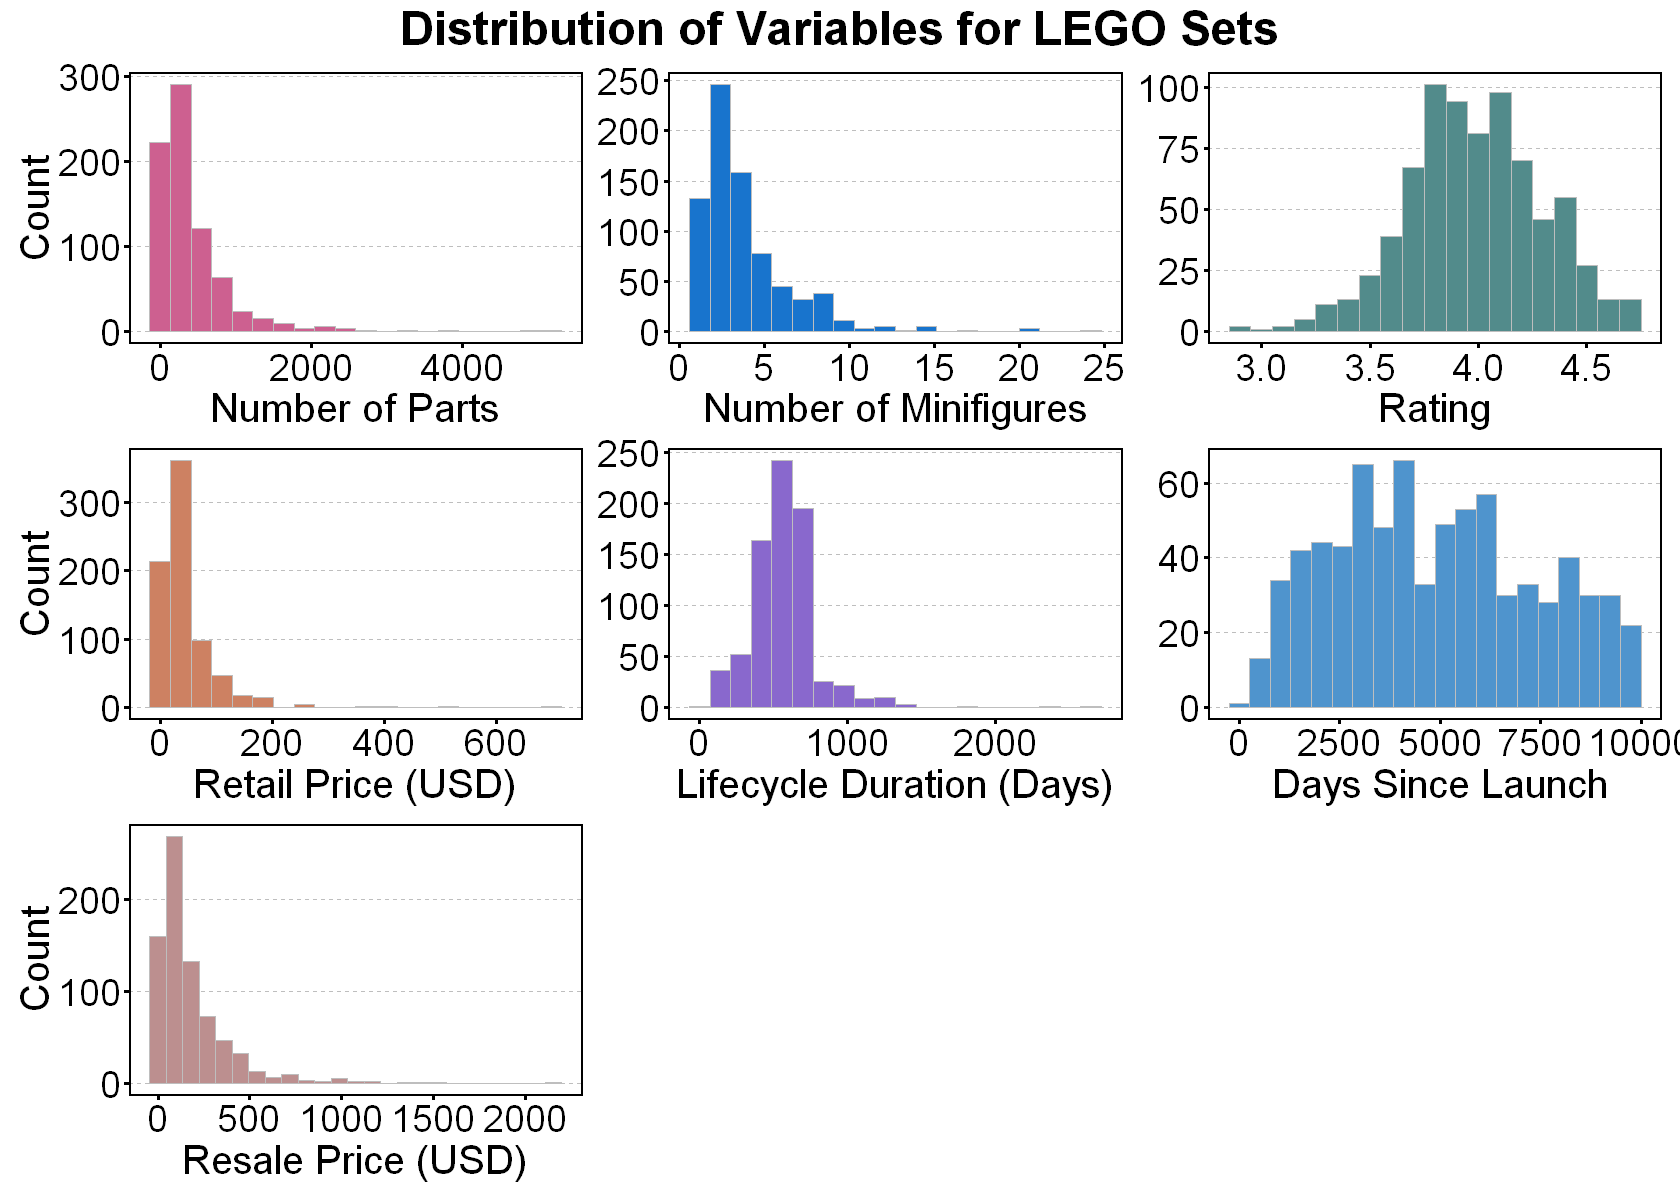

In [53]:
# Combine all the plots
hist_plot <- parts_count_plot + minifigures_plot + rating_plot + 
             retail_price_plot+ lifecycle_plot + days_since_lauch_plot + 
             resale_price_plot +
             plot_layout(ncol = 3, nrow = 3) +
             plot_annotation(title = "Distribution of Variables for LEGO Sets",
                             theme = theme(plot.title = element_text(size = 28, hjust = 0.5, face = "bold")))

hist_plot

In [57]:
# Save the plot above
ggsave("hist_plot.jpg", plot = hist_plot, width = 20, height = 12, units = "in", dpi = 300)

In [20]:
# Take the logarithmic form of the data
theme_data_log <- theme_data_clean

theme_data_log$parts_count <- log(theme_data_log$parts_count)
theme_data_log$minifigures_count <- log(theme_data_log$minifigures_count + 1)
theme_data_log$retail_price <- log(theme_data_log$retail_price)
theme_data_log$lifecycle_duration <- log(theme_data_log$lifecycle_duration)
theme_data_log$days_since_launch <- log(theme_data_log$days_since_launch)
theme_data_log$resale_price_new <- log(theme_data_log$resale_price_new)

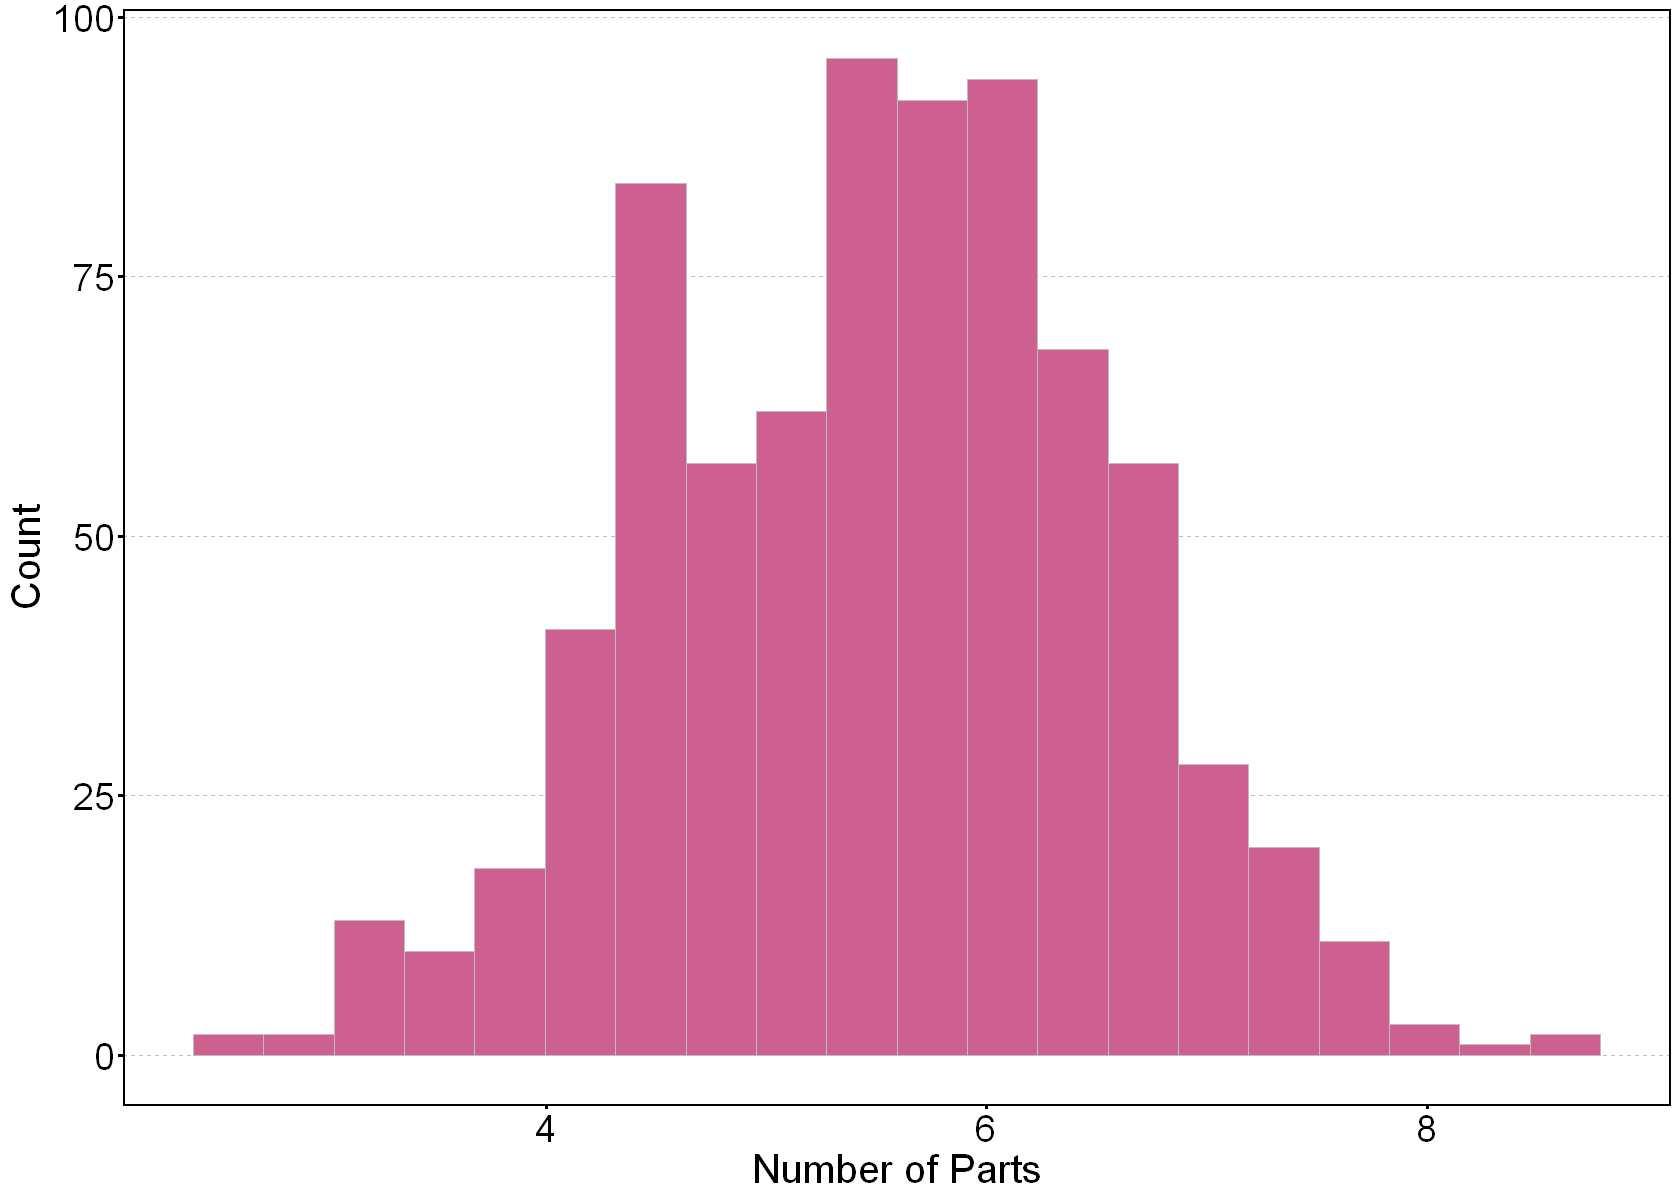

In [83]:
# Create histogram for the variable after logarithmic transformation
log_parts_count_plot <- 
  theme_data_log %>%
  ggplot(aes(x = parts_count)) +
  geom_histogram(bins = 20, fill = 'hotpink3', color = 'gray') +
  labs(
       x = "Number of Parts",
       y = "Count") +
  theme_minimal() +
  theme(
    axis.text = element_text(size = 22, color = "black"),
    axis.title = element_text(size = 24),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), 
    panel.grid.major.y = element_line(colour = "gray", linetype = "dashed"),
    panel.grid.minor.y = element_blank(), 
    axis.ticks = element_line(linewidth = 1), 
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
    axis.line = element_line(colour = "black", linewidth = 0.5))

log_parts_count_plot

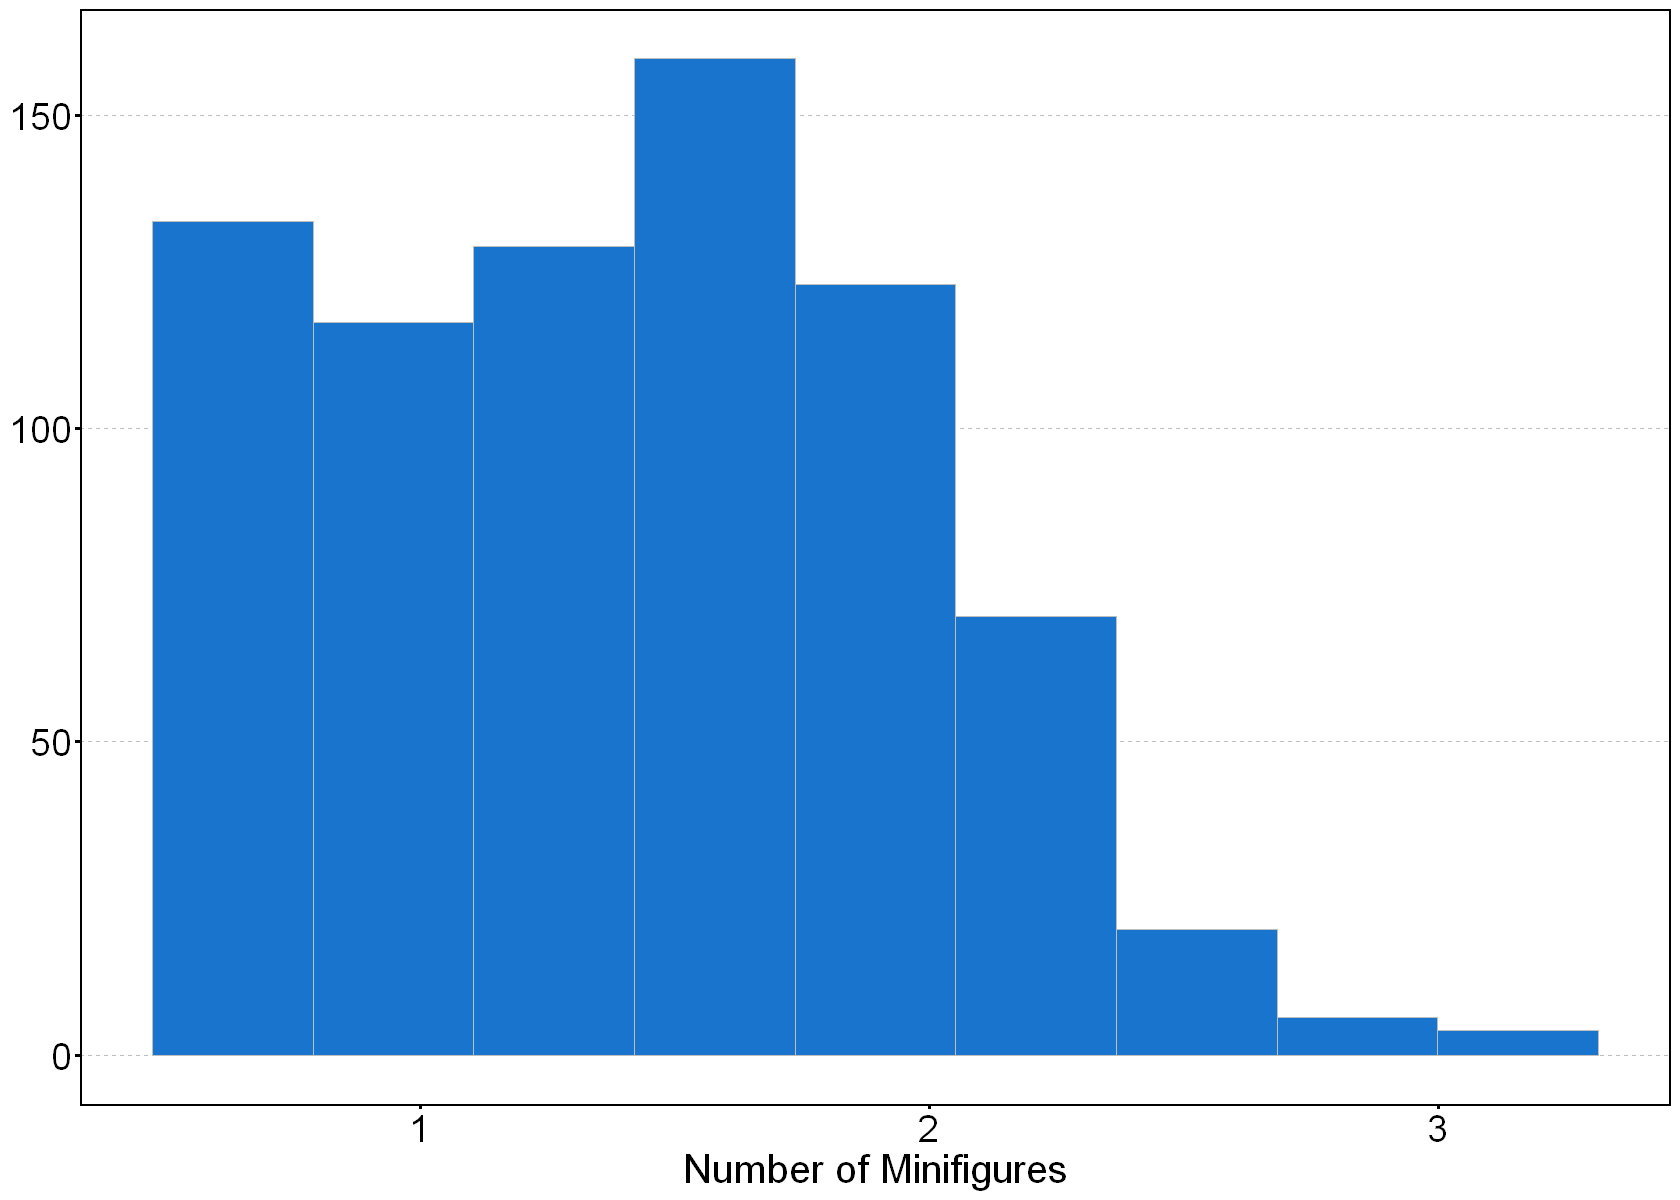

In [75]:
# Create histogram for the variable after logarithmic transformation
log_minifigures_plot <- 
  theme_data_log %>%
  ggplot(aes(x = minifigures_count)) +
  geom_histogram(bins = 9, fill = 'dodgerblue3', color = 'gray') +
  labs(
       x = "Number of Minifigures",
       y = "Count") +
  theme_minimal() +
  theme(
    axis.title.y = element_blank(),
    axis.text = element_text(size = 22, color = "black"), 
    axis.title = element_text(size = 24, color = "black"), 
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.grid.major.y = element_line(colour = "gray", linetype = "dashed"), 
    panel.grid.minor.y = element_blank(), 
    axis.ticks = element_line(linewidth = 1), 
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1), 
    axis.line = element_line(colour = "black", linewidth = 0.5)) 
log_minifigures_plot

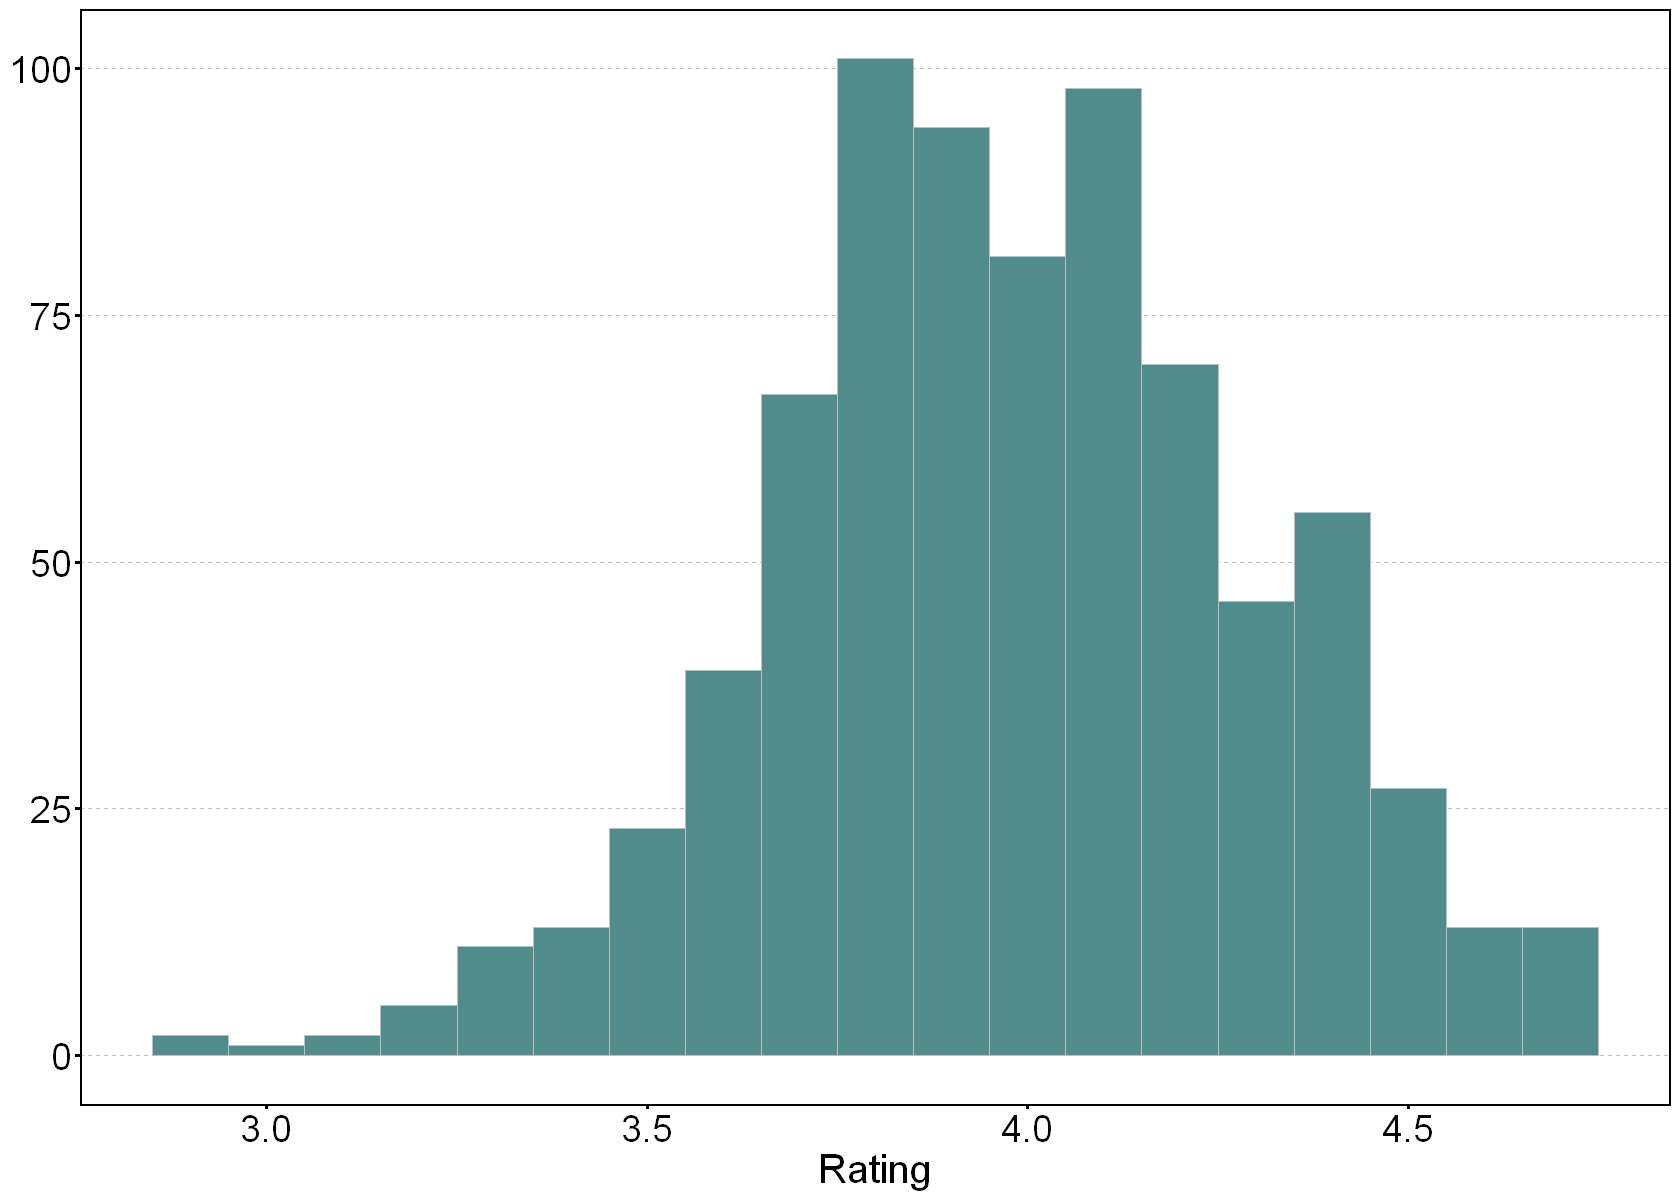

In [76]:
# Create histogram for the variable 
# Rating did not take logarithmic transformation
log_rating_plot <- 
  theme_data_log %>%
  ggplot(aes(x = rating)) +
  geom_histogram(bins = 19, fill = 'darkslategray4', color = 'gray') +
  labs(
       x = "Rating",
       y = "Count") +
  theme_minimal() +
  theme(
    axis.title.y = element_blank(),
    axis.text = element_text(size = 22, color = "black"), 
    axis.title = element_text(size = 24, color = "black"), 
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.grid.major.y = element_line(colour = "gray", linetype = "dashed"), 
    panel.grid.minor.y = element_blank(), 
    axis.ticks = element_line(linewidth = 1), 
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1), 
    axis.line = element_line(colour = "black", linewidth = 0.5)) 
log_rating_plot

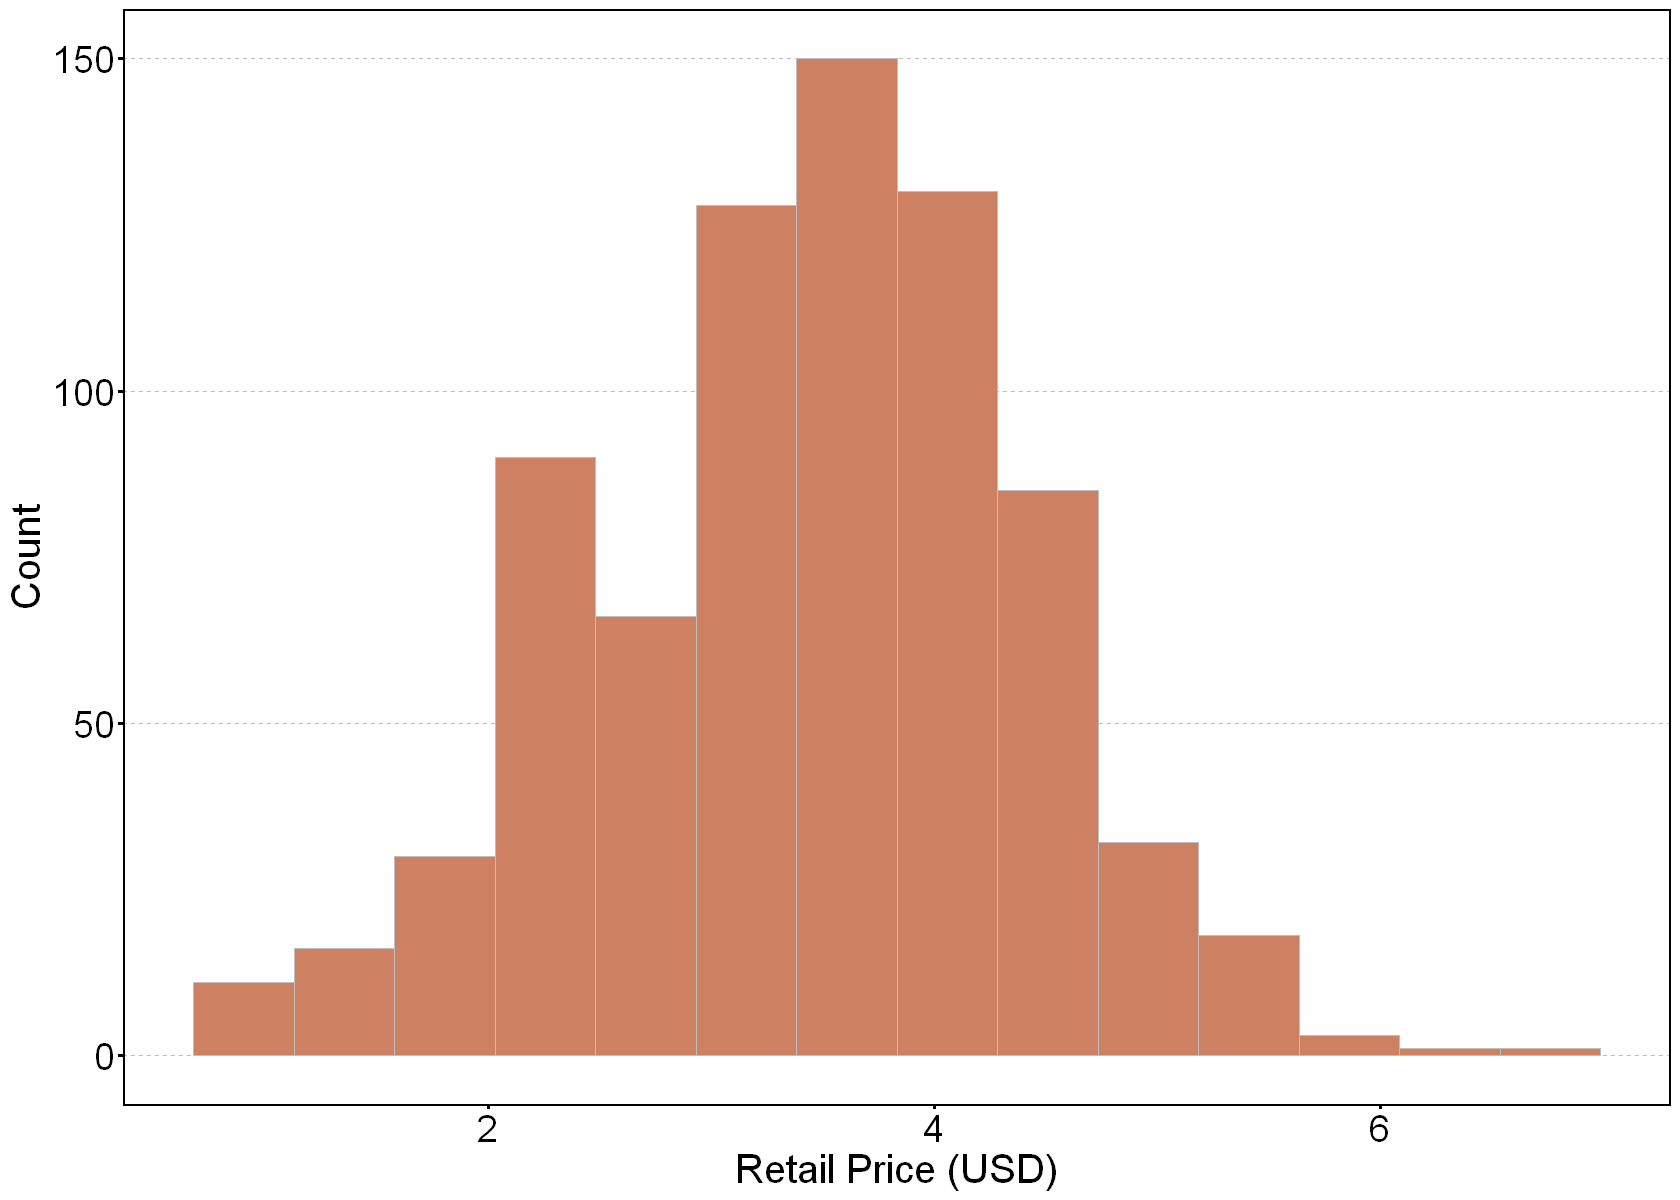

In [77]:
# Create histogram for the variable after logarithmic transformation
log_retail_price_plot <- 
  theme_data_log %>%
  ggplot(aes(x = retail_price)) +
  geom_histogram(bins = 14, fill = 'lightsalmon3', color = 'gray') +
  labs(
       x = "Retail Price (USD)",
       y = "Count") +
  theme_minimal() +
  theme(
    axis.text = element_text(size = 22, color = "black"),
    axis.title = element_text(size = 24),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), 
    panel.grid.major.y = element_line(colour = "gray", linetype = "dashed"),
    panel.grid.minor.y = element_blank(), 
    axis.ticks = element_line(linewidth = 1), 
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
    axis.line = element_line(colour = "black", linewidth = 0.5))

log_retail_price_plot

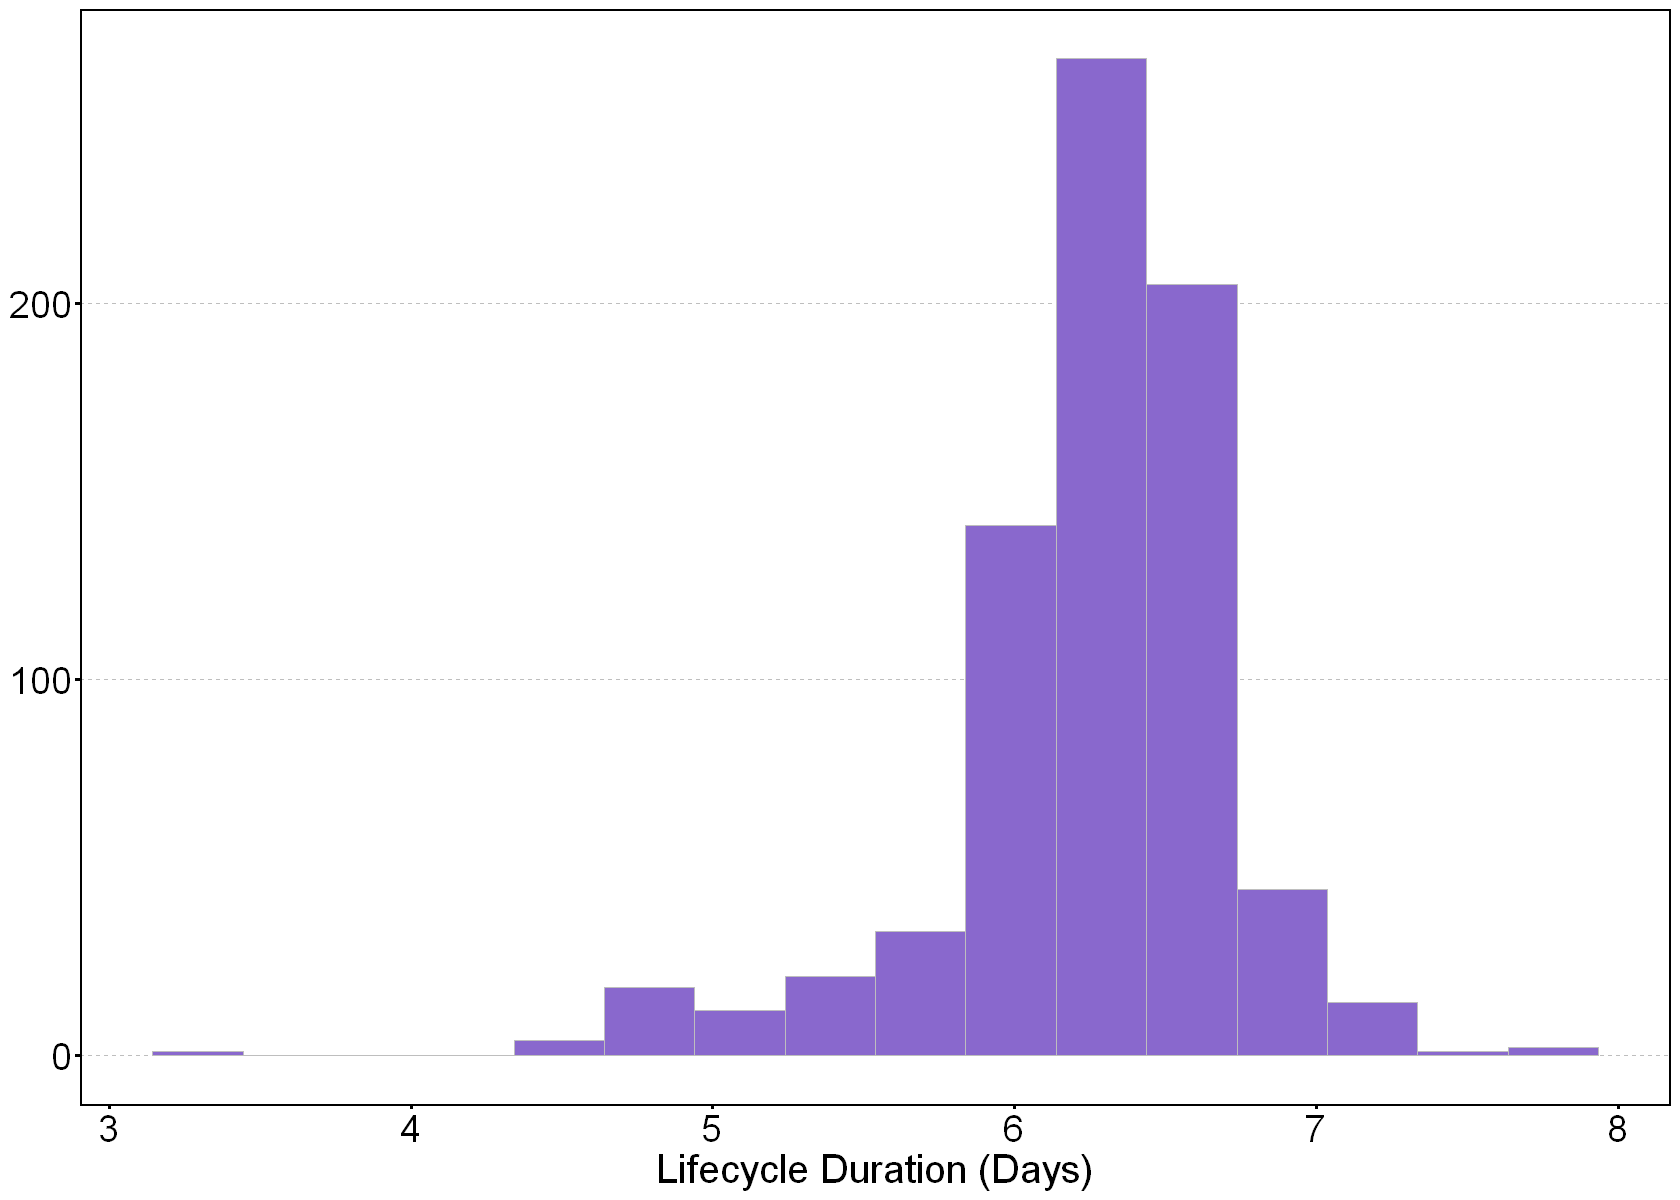

In [78]:
# Create histogram for the variable after logarithmic transformation
log_lifecycle_plot <- 
  theme_data_log %>%
  ggplot(aes(x = lifecycle_duration)) +
  geom_histogram(bins = 16, fill = 'mediumpurple3', color = 'gray') +
  labs(
       x = "Lifecycle Duration (Days)",
       y = "Count") +
  theme_minimal() +
  theme(
    axis.title.y = element_blank(),
    axis.text = element_text(size = 22, color = "black"), 
    axis.title = element_text(size = 24, color = "black"), 
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.grid.major.y = element_line(colour = "gray", linetype = "dashed"), 
    panel.grid.minor.y = element_blank(), 
    axis.ticks = element_line(linewidth = 1), 
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1), 
    axis.line = element_line(colour = "black", linewidth = 0.5))
      
log_lifecycle_plot

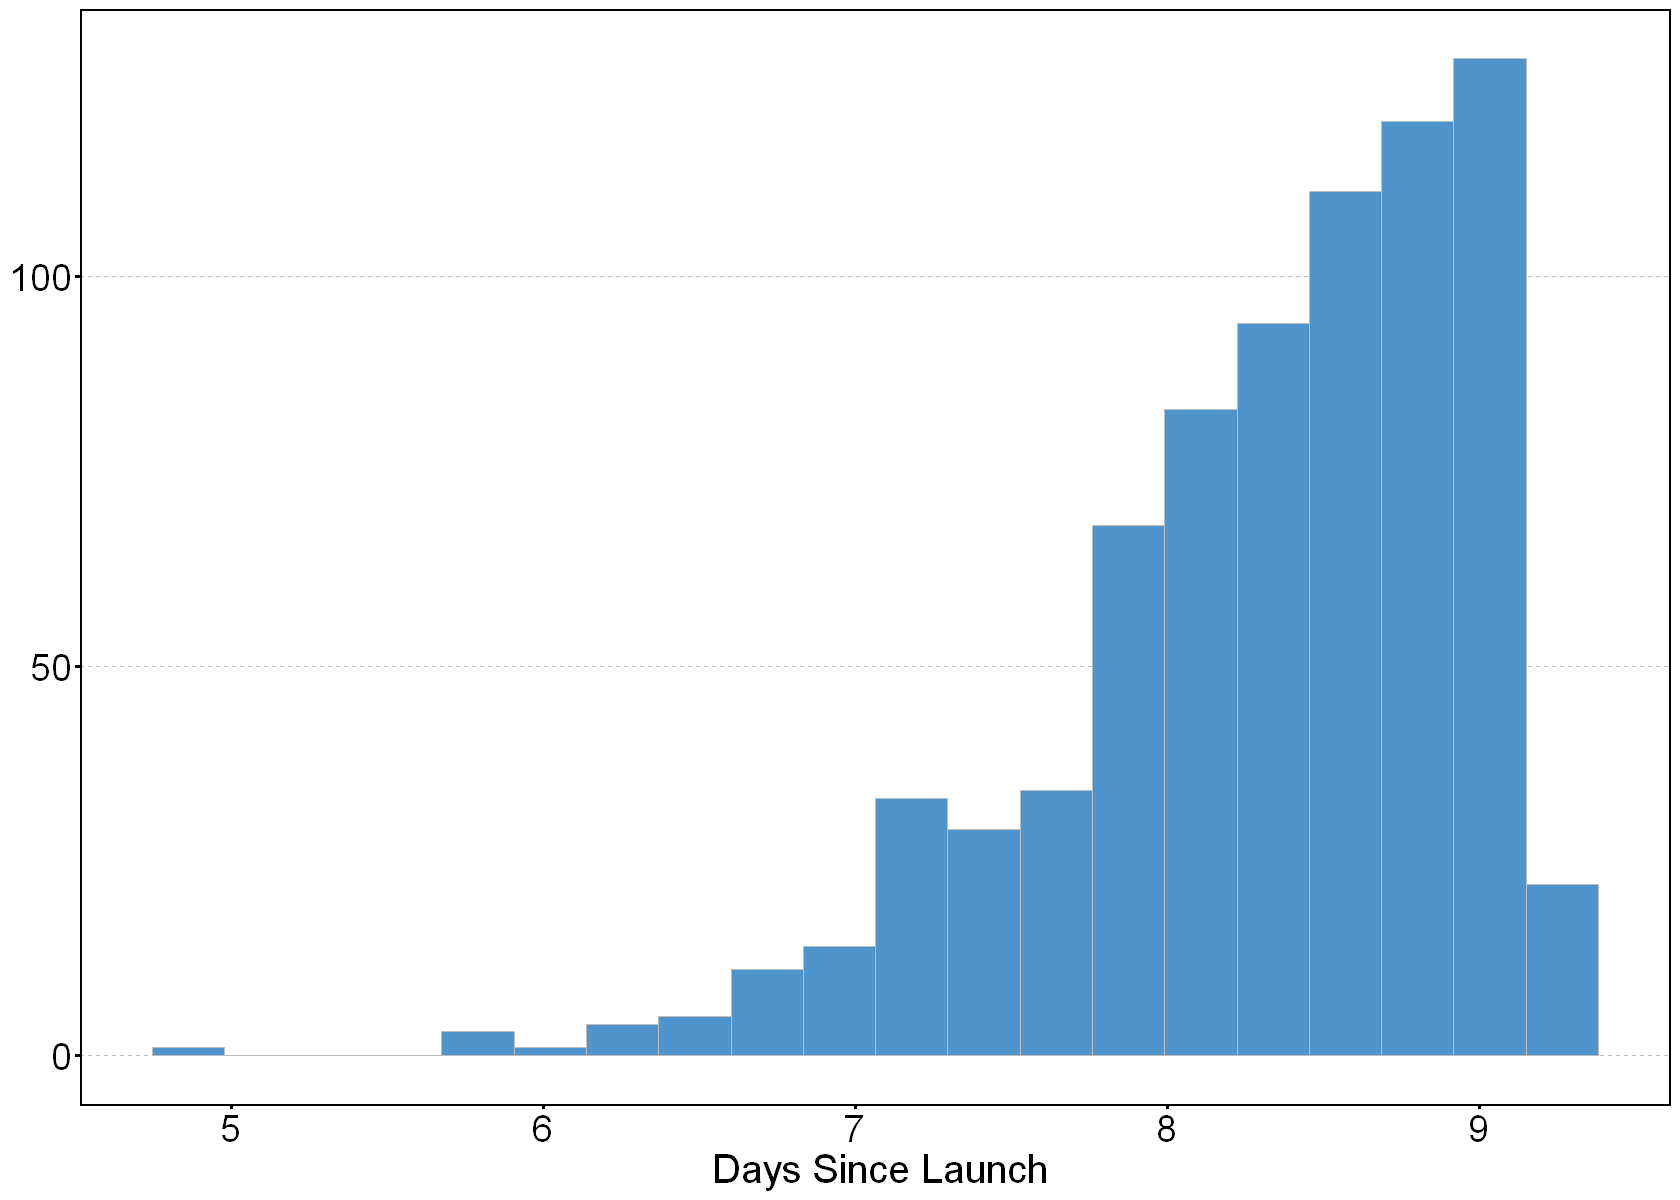

In [79]:
# Create histogram for the variable after logarithmic transformation
log_days_since_lauch_plot <- 
  theme_data_log %>%
  ggplot(aes(x = days_since_launch)) +
  geom_histogram(bins = 20, fill = 'steelblue3', color = 'gray') +
  labs(
       x = " Days Since Launch",
       y = "Count") +
  theme_minimal() +
  theme(
    axis.title.y = element_blank(),
    axis.text = element_text(size = 22, color = "black"), 
    axis.title = element_text(size = 24, color = "black"), 
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.grid.major.y = element_line(colour = "gray", linetype = "dashed"), 
    panel.grid.minor.y = element_blank(), 
    axis.ticks = element_line(linewidth = 1), 
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1), 
    axis.line = element_line(colour = "black", linewidth = 0.5))
log_days_since_lauch_plot

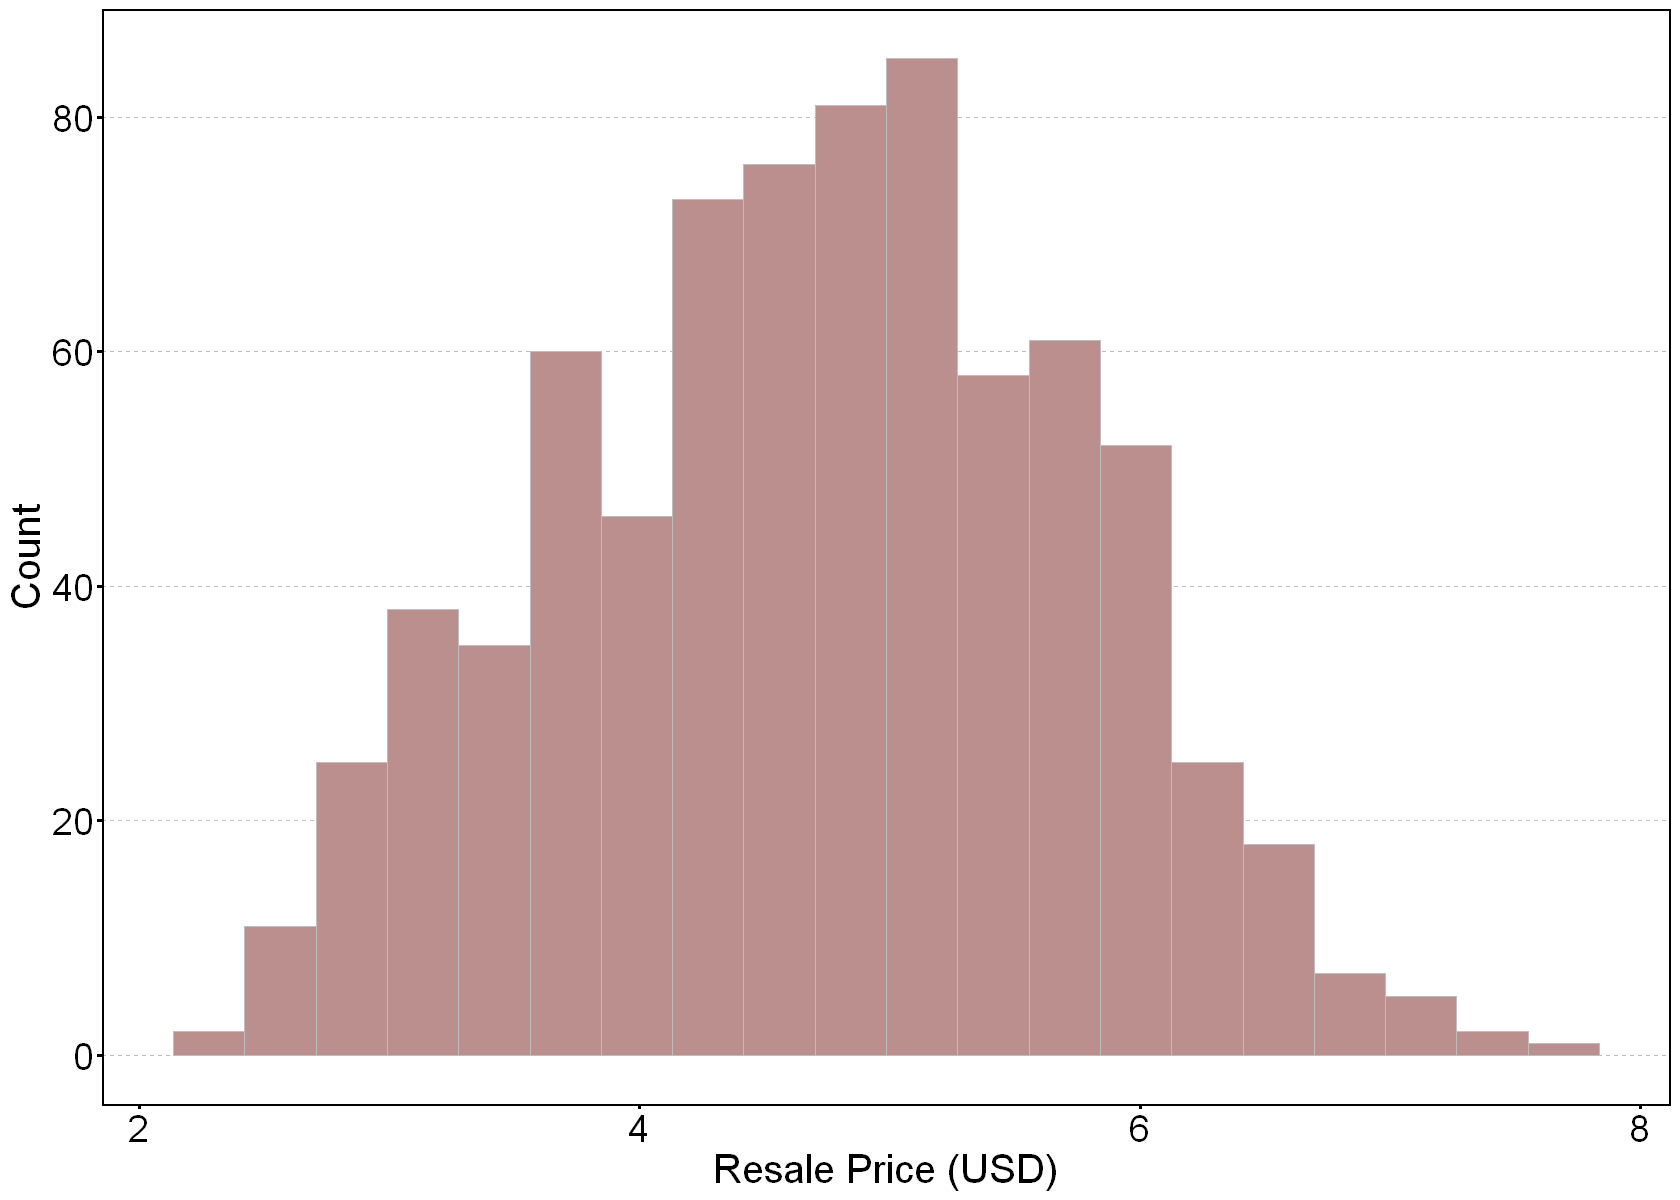

In [80]:
# Create histogram for the variable after logarithmic transformation
log_resale_price_plot <- 
  theme_data_log %>%
  ggplot(aes(x = resale_price_new)) +
  geom_histogram(bins = 20, fill = 'rosybrown', color = 'gray') +
  labs(
       x = "Resale Price (USD)",
       y = "Count") +
  theme_minimal() +
  theme(
    axis.text = element_text(size = 22, color = "black"), 
    axis.title = element_text(size = 24),
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.grid.major.y = element_line(colour = "gray", linetype = "dashed"), 
    panel.grid.minor.y = element_blank(), 
    axis.ticks = element_line(linewidth = 1), 
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1), 
    axis.line = element_line(colour = "black", linewidth = 0.5)) 

log_resale_price_plot

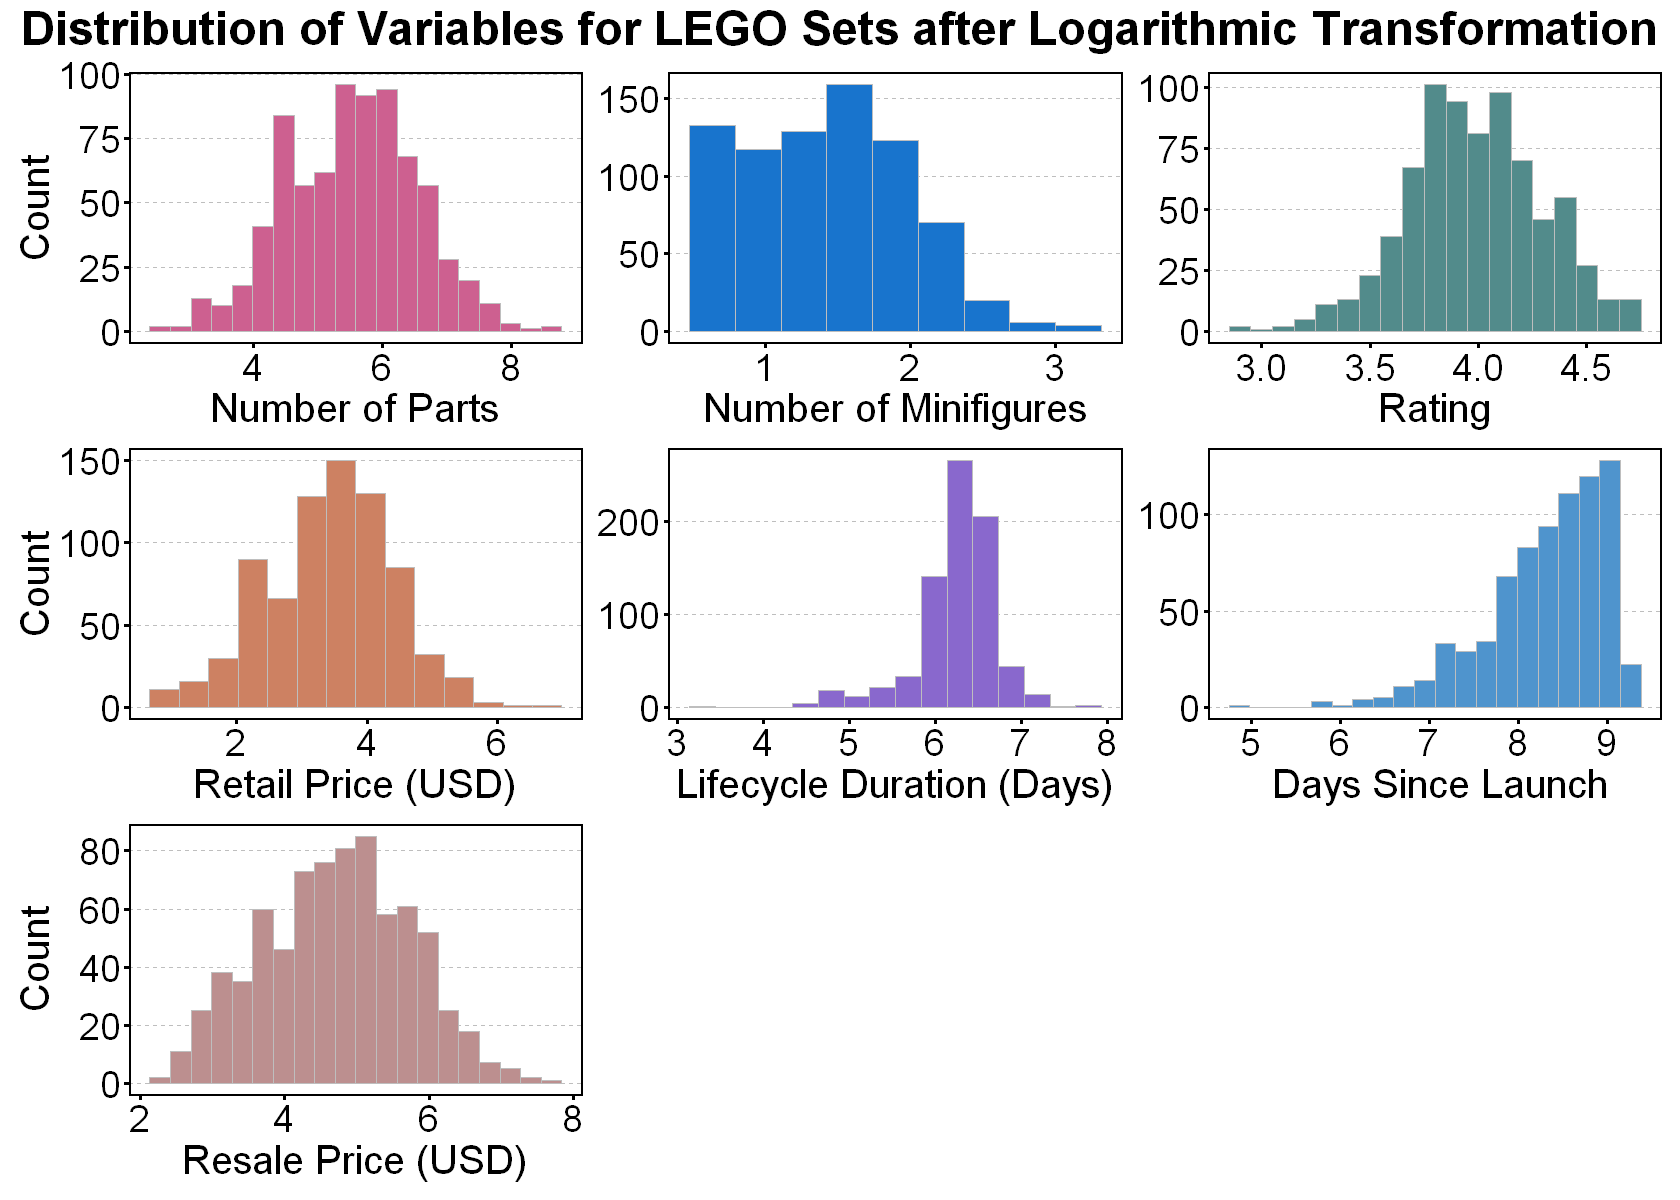

In [84]:
# Combine all the plots
log_hist_plot <- 
             log_parts_count_plot + log_minifigures_plot + log_rating_plot + 
             log_retail_price_plot+ log_lifecycle_plot + log_days_since_lauch_plot + 
             log_resale_price_plot +
             plot_layout(ncol = 3, nrow = 3) +
             plot_annotation(title = "Distribution of Variables for LEGO Sets after Logarithmic Transformation",
                             theme = theme(plot.title = element_text(size = 28, hjust = 0.5, face = "bold")))

log_hist_plot

In [86]:
# Save the plot above
ggsave("log_hist_plot.jpg", plot = log_hist_plot, width = 20, height = 12, units = "in", dpi = 300)

### Random Forest Model on Original Data

In [92]:
# Set categorical variables "is_starwars" and "is_from_retired_theme" as factors
theme_data_clean$is_starwars <- as.factor(theme_data_clean$is_starwars)
theme_data_clean$is_from_retired_theme <- as.factor(theme_data_clean$is_from_retired_theme)

# Set random seed
set.seed(123)
rows_clean <- nrow(theme_data_clean)
shuffled_indices_clean <- sample(1:rows_clean, rows_clean)
train_size_clean <- floor(0.8 * rows_clean)                      
train_indices_clean <- shuffled_indices_clean[1:train_size_clean]         # 80% as train data
test_indices_clean <- shuffled_indices_clean[(train_size_clean + 1):rows_clean] # 20% as test data

train_set <- theme_data_clean[train_indices_clean, ]
test_set<- theme_data_clean[test_indices_clean, ]

# Check data
nrow(train_set)
nrow(test_set)

[1] 608

[1] 153

In [95]:
# Call the function
set.seed(1234)
rf_result <- 
  evaluate_rf_model(train_set, "resale_price_new")

rf_result

ntree,mtry,RMSE,Rsquared
<dbl>,<int>,<dbl>,<dbl>
100,1,146.2131,0.6213692
100,2,133.3359,0.6447327
100,3,136.3145,0.6233239
100,4,132.0446,0.6461852
100,5,135.5656,0.6261058
100,6,132.7649,0.6417305
100,7,134.7812,0.6304527
100,8,134.7135,0.6307740
200,1,149.6852,0.5921729


In [96]:
# Find the parameter combination with lowest RMSE
rf_best_rmse <- 
  rf_result[which.min(rf_result$RMSE), ]

# Find the parameter combination with lowest R-square
rf_best_rsq <- 
  rf_result[which.max(rf_result$Rsquared), ]

# Check the result
rf_best_rmse
rf_best_rsq

,ntree,mtry,RMSE,Rsquared
,<dbl>,<int>,<dbl>,<dbl>
14,200,6,129.5716,0.6600902


,ntree,mtry,RMSE,Rsquared
,<dbl>,<int>,<dbl>,<dbl>
14,200,6,129.5716,0.6600902


In [97]:
set.seed(1234)

# Train the model on the training dataset using optimal parameters
final_model_rf <- 
  randomForest(resale_price_new ~ ., 
               data = train_set, 
               ntree = 200, 
               mtry = 6)

# Use the final model to make predictions on the test dataset
test_predictions <- 
  predict(final_model_rf, test_set)

# Calculate RMSE
test_rmse <- 
  rmse(test_set$resale_price_new, test_predictions)

# Calculate R-square
test_rsq <- 
  R2(test_predictions, test_set$resale_price_new)

test_p <-
  cor(test_predictions, test_set$resale_price_new)

# Print the results
print(paste("RMSE on test set is: ", test_rmse))
print(paste("R-squared on test set is:", test_rsq))
print(paste("Correlation coefficient on test set is: ", test_p ))

[1] "RMSE on test set is:  119.099696002189"
[1] "R-squared on test set is: 0.511231325582447"
[1] "Correlation coefficient on test set is:  0.715004423470545"


In [98]:
# Predict on dataset for vasualisation
total_test_predictions <- 
  predict(final_model_rf, theme_data_clean)

total_actual_predict_data <-
  data.frame(actual = theme_data_clean$resale_price_new,
             predicted = total_test_predictions)


In [100]:
# Check the statistics of actual and predicted data
summary(total_actual_predict_data)

     actual          predicted      
 Min.   :   9.65   Min.   :  14.53  
 1st Qu.:  52.26   1st Qu.:  60.84  
 Median : 115.73   Median : 123.50  
 Mean   : 182.98   Mean   : 183.38  
 3rd Qu.: 235.16   3rd Qu.: 242.10  
 Max.   :2165.01   Max.   :1618.26  

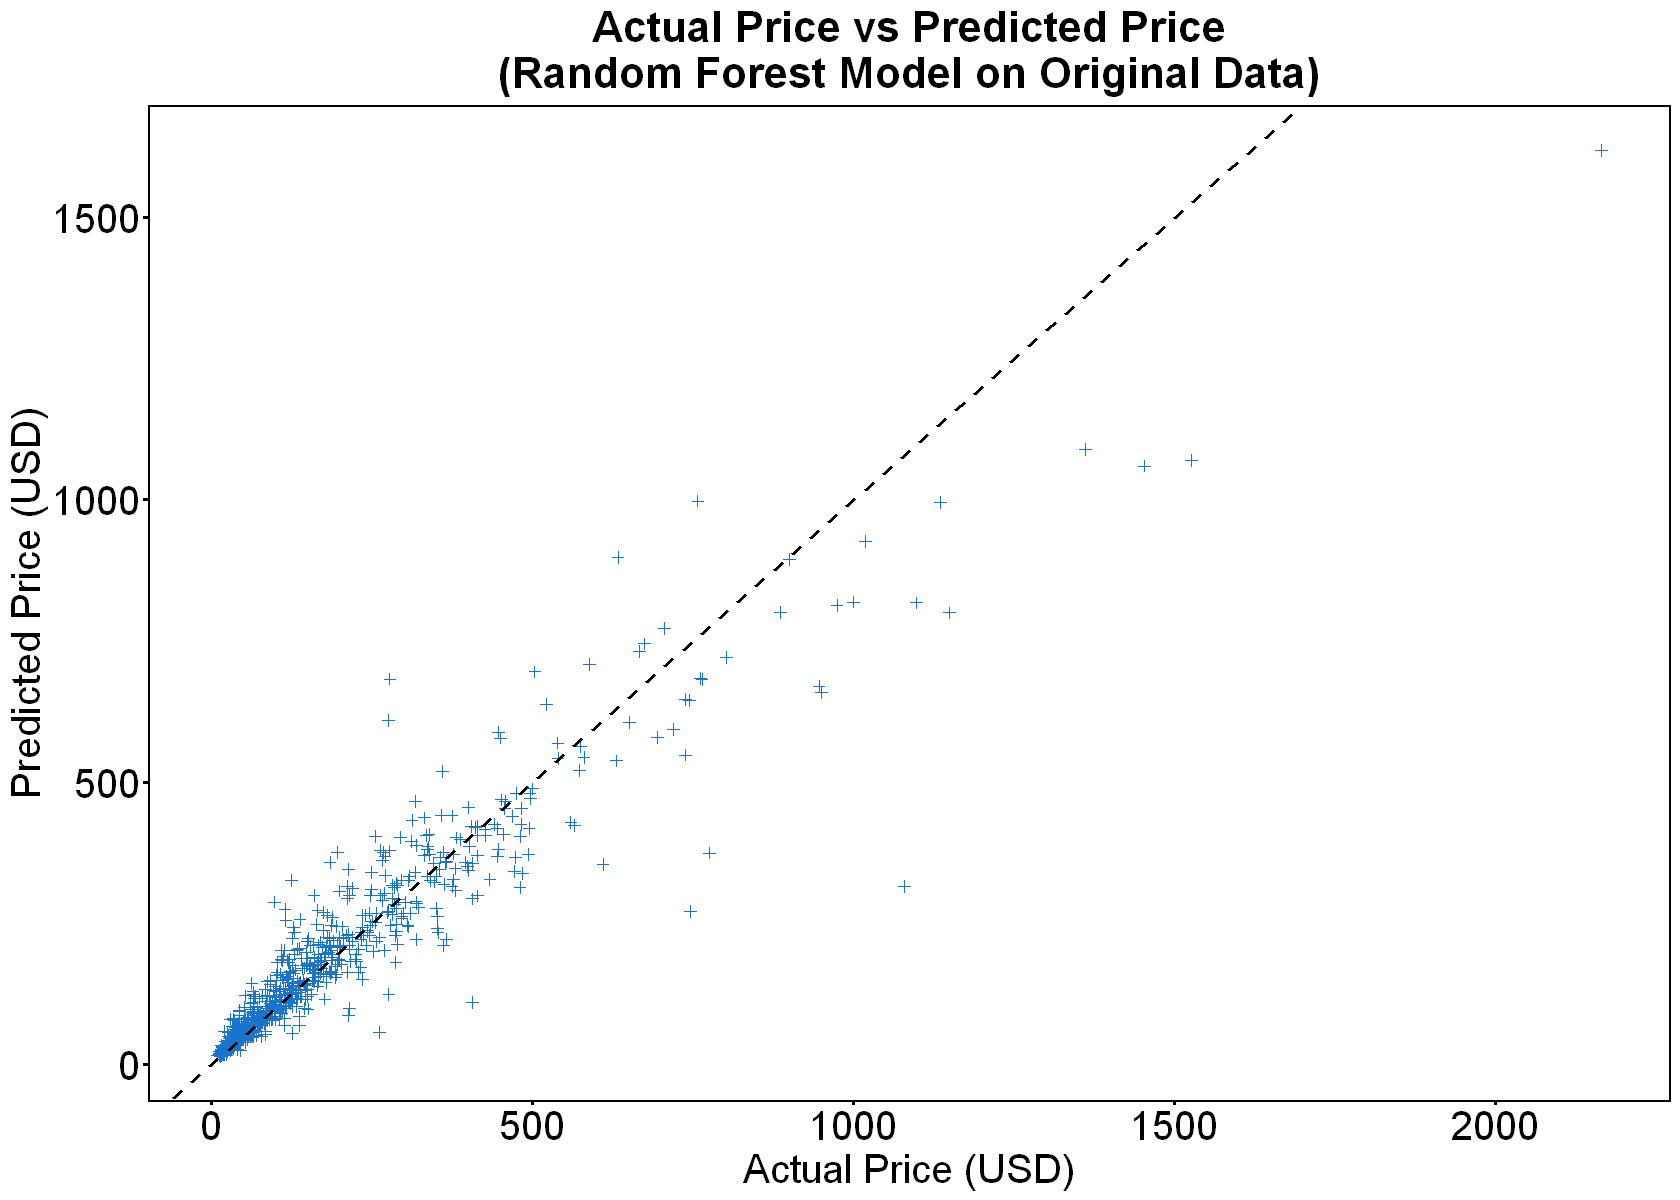

In [101]:
# Create a scatter plot to visualize actual price vs predicted price
actual_predicted_plot <- 
  total_actual_predict_data %>%
  ggplot(aes(x = actual, y = predicted)) +
  geom_point(shape = 3, color = "dodgerblue3", size = 2) +
  labs(
    x = "Actual Price (USD)",
    y = "Predicted Price (USD)",
    title = "Actual Price vs Predicted Price\n(Random Forest Model on Original Data)"
  ) +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "black", linewidth = 1) + 
  theme_minimal() +
  theme(
    plot.title = element_text(size = 26, hjust = 0.5, face = "bold"),
    axis.title = element_text(size =24, color = 'black'),
    axis.text = element_text(size = 24, color = 'black'),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.grid.minor.y = element_blank(),
    axis.ticks = element_line(linewidth = 1),
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
    axis.line = element_line(colour = "black", linewidth = 0.5))

actual_predicted_plot

In [103]:
ggsave("rf_actual_predicted_plot.jpg", plot = actual_predicted_plot, width = 15, height = 10, units = "in", dpi = 300)

In [104]:
# To analyze the variable importance in Random Forest model
importance_values <- 
  importance(final_model_rf)

# Create a dataset to save the results
importance_df <- 
  data.frame(Variable = row.names(importance_values), 
                            Importance = importance_values[, 'IncNodePurity'])

# Order the ranking from most important to least important
importance_df <-
  importance_df[order(-importance_df$Importance),]

# Check the results
str(importance_values)
colnames(importance_values)

 num [1:8, 1] 4653107 1014231 5944466 10304266 1146819 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:8] "parts_count" "minifigures_count" "rating" "retail_price" ...
  ..$ : chr "IncNodePurity"


[1] "IncNodePurity"

In [105]:
# Check the data
importance_df

,Variable,Importance
,<chr>,<dbl>
retail_price,retail_price,10304266.3
rating,rating,5944466.0
days_since_launch,days_since_launch,5523236.3
parts_count,parts_count,4653106.5
lifecycle_duration,lifecycle_duration,1146818.6
minifigures_count,minifigures_count,1014230.6
is_starwars,is_starwars,166958.1
is_from_retired_theme,is_from_retired_theme,146243.1


In [108]:
# Rename the variables to visualize
new_variable_names <- c("Retail Price", "Rating", "Days Since Launch", 
                        "Number of Parts", "Lifecycle Duration", "Number of Minifigures", 
                        "Is from Star Wars", "Is from Retired Theme")

# Assign the variable name to dateset
importance_df$Variable <- new_variable_names

# Check the results
print(importance_df)

                                   Variable Importance
retail_price                   Retail Price 10304266.3
rating                               Rating  5944466.0
days_since_launch         Days Since Launch  5523236.3
parts_count                 Number of Parts  4653106.5
lifecycle_duration       Lifecycle Duration  1146818.6
minifigures_count     Number of Minifigures  1014230.6
is_starwars               Is from Star Wars   166958.1
is_from_retired_theme Is from Retired Theme   146243.1


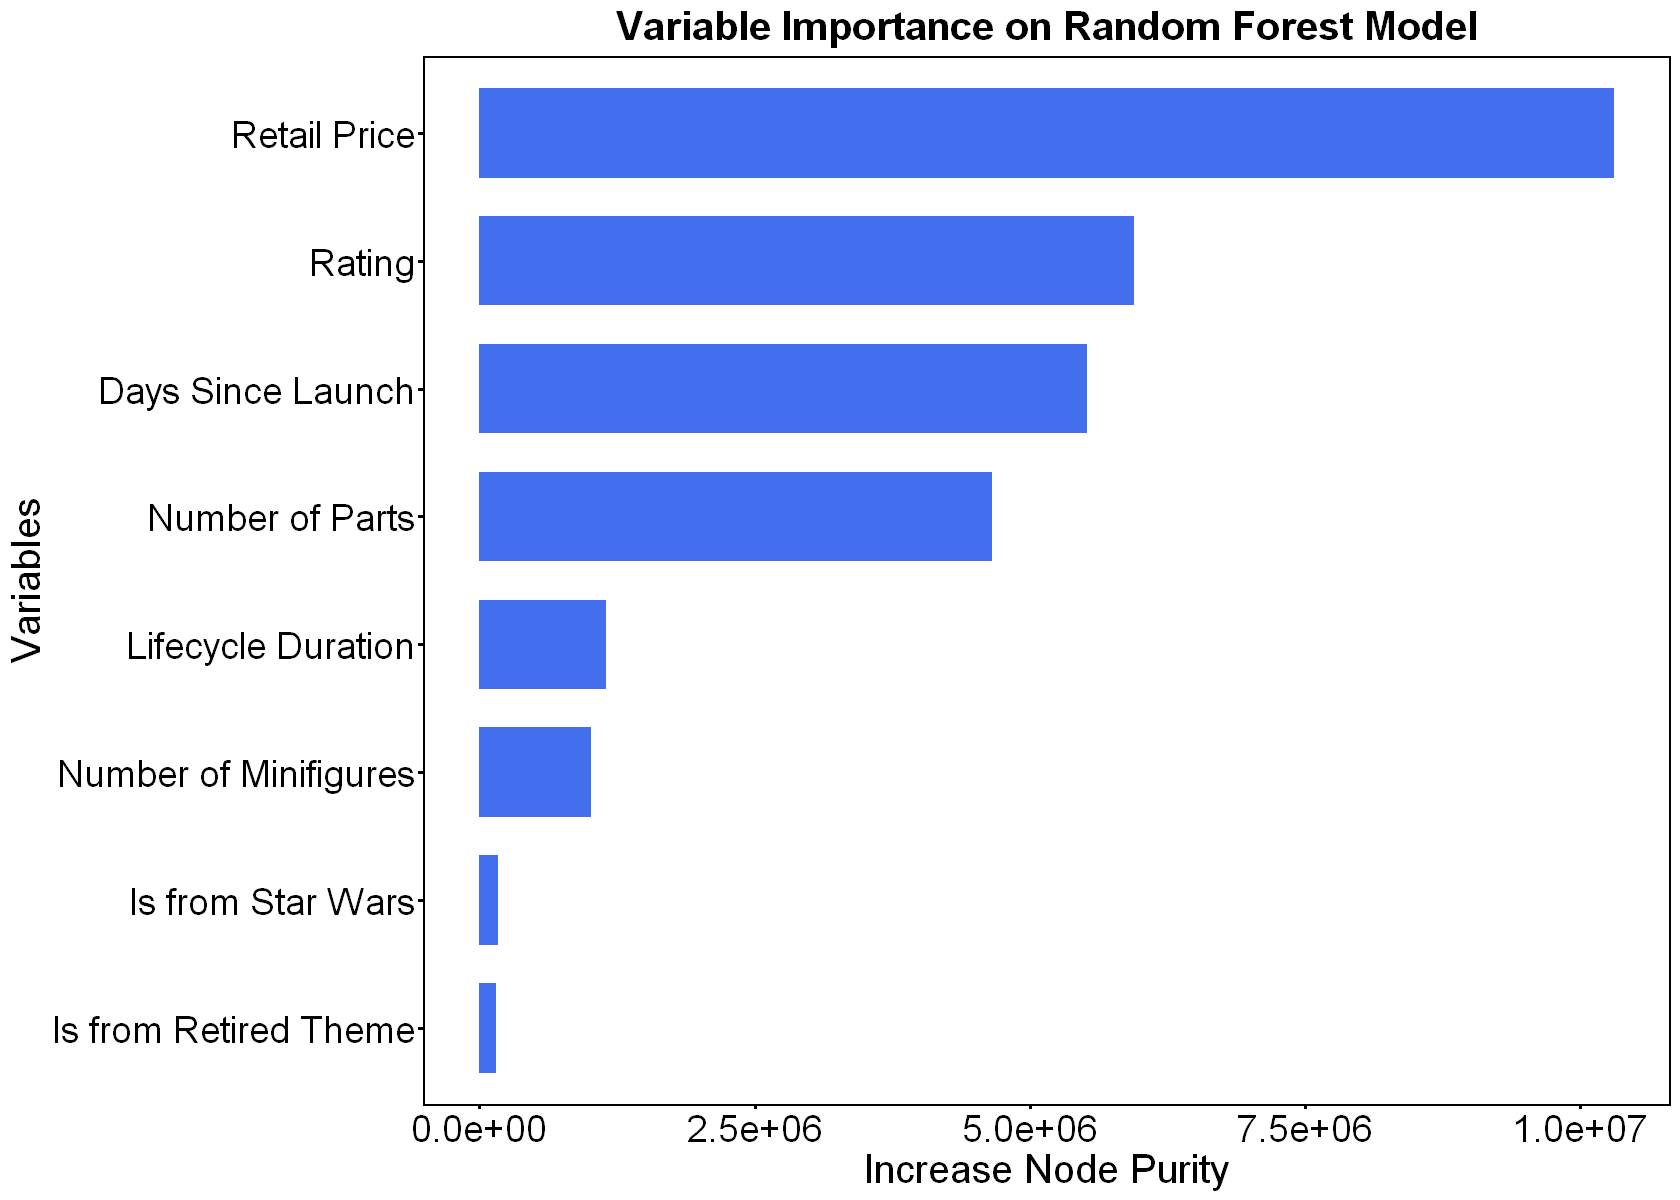

In [113]:
# Create the variable importance visualisation
variable_importance_plot <- 
  importance_df %>%
  ggplot(aes(x = reorder(Variable, Importance), y = Importance)) +
  geom_bar(stat = "identity", width = 0.7, fill = "royalblue2") +
  coord_flip() +  
  theme_minimal() +
  labs(title = "Variable Importance on Random Forest Model",
       x = "Variables",
       y = "Increase Node Purity") +
   theme(
        plot.title = element_text(hjust = 0.5, size = 24, face = "bold"),
        axis.title = element_text(size = 24),
        axis.text = element_text(size = 22, color = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
        axis.ticks = element_line(linewidth = 1))

variable_importance_plot

In [114]:
# Save the plot above
ggsave("variable_importance_plot.jpg", plot = variable_importance_plot, width = 14, height = 8, units = "in", dpi = 300)

### Random Forest Model on Logarithmic Transformation Data

In [21]:
theme_data_log_clean <- theme_data_clean

# Convert numerical variables to logarithms
theme_data_log_clean$parts_count <- log(theme_data_log_clean$parts_count)

# There are many 1 value in minifigures, plus 1 to aviod generating 0
theme_data_log_clean$minifigures_count <- log(theme_data_log_clean$minifigures_count + 1)
theme_data_log_clean$days_since_launch <- log(theme_data_log_clean$days_since_launch)
theme_data_log_clean$retail_price <- log(theme_data_log_clean$retail_price)
theme_data_log_clean$lifecycle_duration <- log(theme_data_log_clean$lifecycle_duration)
theme_data_log_clean$resale_price_new <- log(theme_data_log_clean$resale_price_new)

In [22]:
# Check the statistics of the data
summary(theme_data_log_clean)

  parts_count    minifigures_count     rating       retail_price   
 Min.   :2.485   Min.   :0.6931    Min.   :2.900   Min.   :0.6931  
 1st Qu.:4.700   1st Qu.:1.0986    1st Qu.:3.800   1st Qu.:2.7074  
 Median :5.583   Median :1.6094    Median :4.000   Median :3.4009  
 Mean   :5.529   Mean   :1.4621    Mean   :3.985   Mean   :3.3805  
 3rd Qu.:6.230   3rd Qu.:1.7918    3rd Qu.:4.200   3rd Qu.:3.9120  
 Max.   :8.556   Max.   :3.2189    Max.   :4.700   Max.   :6.5511  
 lifecycle_duration days_since_launch resale_price_new is_from_retired_theme
 Min.   :3.401      Min.   :4.796     Min.   :2.267    0:554                
 1st Qu.:5.900      1st Qu.:7.980     1st Qu.:3.956    1:207                
 Median :6.360      Median :8.465     Median :4.751                         
 Mean   :6.247      Mean   :8.323     Mean   :4.709                         
 3rd Qu.:6.592      3rd Qu.:8.818     3rd Qu.:5.460                         
 Max.   :7.892      Max.   :9.196     Max.   :7.680           

In [23]:
set.seed(123)
# Set "is_starwars" and "is from retired themes" as factors
theme_data_log_clean$is_starwars <- as.factor(theme_data_log_clean$is_starwars)
theme_data_log_clean$is_from_retired_theme <- as.factor(theme_data_log_clean$is_from_retired_theme)

# Calculate the size of the training data set
train_size_log <- floor(0.8 * nrow(theme_data_log_clean))

# Create a random row index vector
train_index_log <- sample(seq_len(nrow(theme_data_log_clean)), size = train_size_log)

# Create training set and test set based on index
train_set_log <- theme_data_log_clean[train_index_log, ]
test_set_log <- theme_data_log_clean[-train_index_log, ]

# Check the rows of traing and test set
nrow(train_set_log)
nrow(test_set_log)

[1] 608

[1] 153

In [24]:
# Create a function to train the Random Forest model using different parameters
log_evaluate_rf_model <- function(data, outcome_var_name, folds = 10) {
  
  # The varied parametersin the model
  ntree_values <- c(100, 200, 300, 400, 500)
  mtry_values <- 1:8
  
  # Create a dataset to save the results
  results <- expand.grid(ntree = integer(), mtry = integer(), RMSE = double(), Rsquared = double(), stringsAsFactors = FALSE)
  
  # Iterate through each parameter combination
  for (ntree in ntree_values) {
    for (mtry in mtry_values) {
        
      # Use k-fold cross validation, k is 10
      train_control <- trainControl(method = "cv", number = folds, search = "grid", savePredictions = "final")
      
      # train the random forest model
      model <- train(reformulate(".", outcome_var_name), data = data,
                     method = "rf",
                     trControl = train_control,
                     tuneGrid = data.frame(mtry = mtry),
                     ntree = ntree,
                     metric = "RMSE")
      
      # Restore predicted and observed values from logarithmic form
      preds_exp <- exp(model$pred$pred) 
      obs_exp <- exp(model$pred$obs) 
      
      # Calculate RMSE
      rmse_val <- round(rmse(obs_exp, preds_exp), 4)
      
       # Calculate R-square
      rsq_val <- round(R2(obs_exp, preds_exp), 4)
      
      # Save the results
      results <- rbind(results, data.frame(ntree = ntree, mtry = mtry, RMSE = rmse_val, Rsquared = rsq_val))
    }
  }
  
  return(results)
}

In [25]:
set.seed(1234)
# Call the function to train on train set
log_result <- 
  log_evaluate_rf_model(train_set_log, "resale_price_new")

log_result

ntree,mtry,RMSE,Rsquared
<dbl>,<int>,<dbl>,<dbl>
100,1,169.3804,0.5769
100,2,145.5786,0.6124
100,3,138.1191,0.6478
100,4,136.4799,0.6447
100,5,137.5306,0.6401
100,6,137.8141,0.6353
100,7,137.7526,0.6369
100,8,135.9865,0.6453
200,1,167.2686,0.5930


In [26]:
# Find the parameter combination with lowest RMSE
log_best_rmse <- 
  log_result[which.min(log_result$RMSE), ]

# Find the parameter combination with lowest R-square
log_best_rsq <- 
  log_result[which.max(log_result$Rsquared), ]

# Check the result
log_best_rmse
log_best_rsq

,ntree,mtry,RMSE,Rsquared
,<dbl>,<int>,<dbl>,<dbl>
21,300,5,133.6964,0.6662


,ntree,mtry,RMSE,Rsquared
,<dbl>,<int>,<dbl>,<dbl>
21,300,5,133.6964,0.6662


In [27]:
# Train the model on the training dataset using optimal parameters
log_final_model_rf <- 
  randomForest(resale_price_new ~ ., 
               data = train_set_log, 
               ntree = 300, 
               mtry = 5)

# Use the final model to make predictions on the test dataset
clean_test_predictions_log <- 
  predict(log_final_model_rf, test_set_log) %>%
  exp()

# Calculate RMSE and R-square on the test set 
log_test_rmse <- 
  rmse(exp(test_set_log$resale_price_new), clean_test_predictions_log)

log_test_rsq <- 
  R2(clean_test_predictions_log, exp(test_set_log$resale_price_new))

log_test_r <-
  cor(clean_test_predictions_log, exp(test_set_log$resale_price_new))

# Print the results
print(paste("RMSE on test set is: ", log_test_rmse))
print(paste("R-squared on test set is: ", log_test_rsq))
print(paste("Correlation coefficient on test set is: ", log_test_r))

[1] "RMSE on test set is:  114.981560499672"
[1] "R-squared on test set is:  0.533124871367151"
[1] "Correlation coefficient on test set is:  0.730154005239409"


In [28]:
# Predict on dataset for vasualisation
log_total_test_predictions <- 
  predict(log_final_model_rf, theme_data_log_clean) %>%
  exp()

# Create a dataset for visualisation
log_total_actual_predict_data <-
  data.frame(actual = exp(theme_data_log_clean$resale_price_new),
             predicted = log_total_test_predictions)


In [29]:
# Check statistics of actual and predicted price
summary(log_total_actual_predict_data)

     actual          predicted      
 Min.   :   9.65   Min.   :  13.61  
 1st Qu.:  52.26   1st Qu.:  54.81  
 Median : 115.73   Median : 112.17  
 Mean   : 182.98   Mean   : 168.09  
 3rd Qu.: 235.16   3rd Qu.: 221.43  
 Max.   :2165.01   Max.   :1403.68  

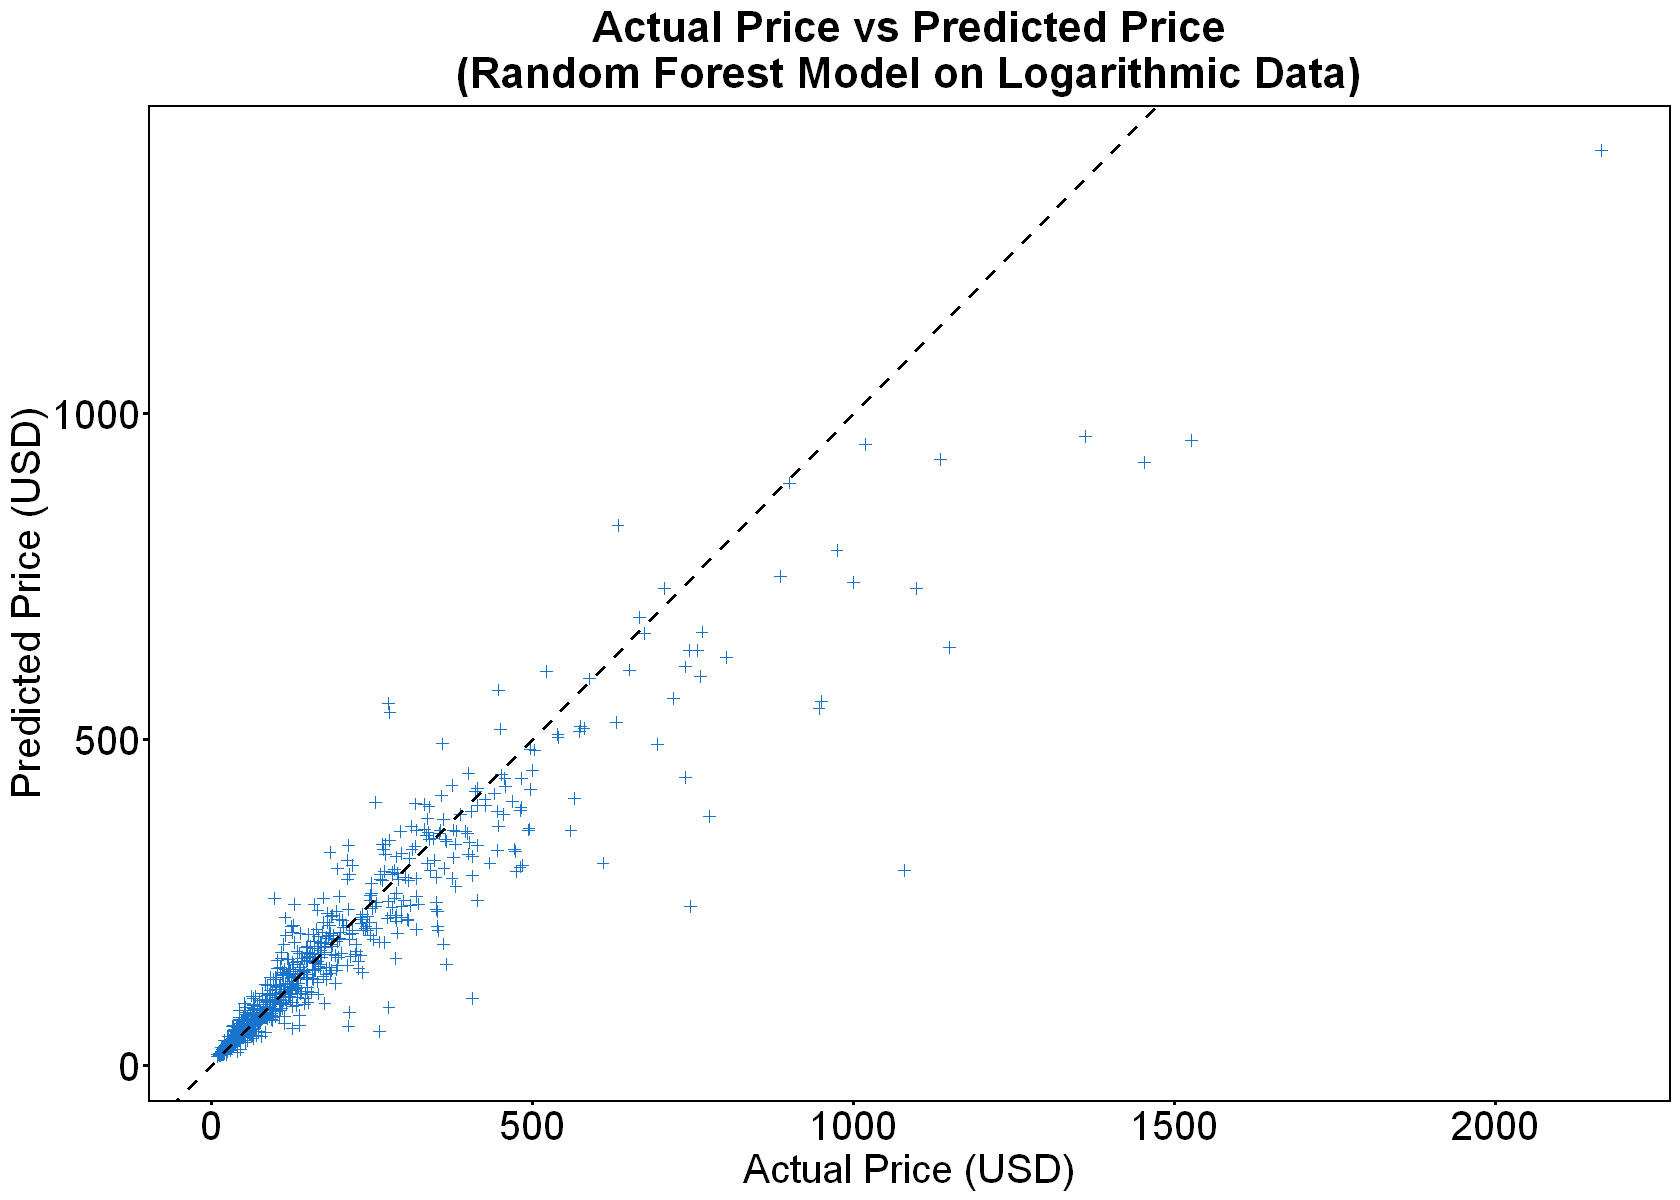

In [127]:
# Create a scatter plot of actual price vs predicted price
log_actual_predicted_plot <- 
  log_total_actual_predict_data %>%
  ggplot(aes(x = actual, y = predicted)) +
  geom_point(shape = 3, color = "dodgerblue3", size = 2) +
  labs(
    x = "Actual Price (USD)",
    y = "Predicted Price (USD)",
    title = "Actual Price vs Predicted Price\n(Random Forest Model on Logarithmic Data)"
  ) +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "black", linewidth = 1) + # 添加斜率为1的线
  theme_minimal() +
  theme(
    plot.title = element_text(size = 26, hjust = 0.5, face = "bold"),
    axis.title = element_text(size =24, color = 'black'),
    axis.text = element_text(size = 24, color = 'black'),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.grid.minor.y = element_blank(),
    axis.ticks = element_line(linewidth = 1),
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
    axis.line = element_line(colour = "black", linewidth = 0.5))

log_actual_predicted_plot

In [128]:
# Save the plot
ggsave("log_rf_actual_predicted_plot.jpg", plot = log_actual_predicted_plot, width = 13, height = 9, units = "in", dpi = 300)

In [30]:
# Analyze the variable importance in Random Forest model
log_importance_values <- importance(log_final_model_rf)

# Save the result in a dataset
log_importance_df <- data.frame(Variable = row.names(log_importance_values), 
                            Importance = log_importance_values[, 'IncNodePurity'])

# Order the variables from most importance to leaset importance
log_importance_df <-
  log_importance_df[order(-log_importance_df$Importance),]

log_importance_df

,Variable,Importance
,<chr>,<dbl>
retail_price,retail_price,240.661843
days_since_launch,days_since_launch,126.244910
parts_count,parts_count,125.639248
rating,rating,101.751473
minifigures_count,minifigures_count,20.889398
lifecycle_duration,lifecycle_duration,20.739018
is_starwars,is_starwars,5.875522
is_from_retired_theme,is_from_retired_theme,2.616655


In [31]:
# Rename the variables to visualize
log_new_variable_names <- c("Retail Price", "Days Since Launch", "Number of Parts",
                        "Rating", "Number of Minifigures", "Lifecycle Duration",
                        "Is Star Wars", "Is from Retired Theme")

# Assign the variable name to dateset
log_importance_df$Variable <- log_new_variable_names

# Check the results
print(log_importance_df)

                                   Variable Importance
retail_price                   Retail Price 240.661843
days_since_launch         Days Since Launch 126.244910
parts_count                 Number of Parts 125.639248
rating                               Rating 101.751473
minifigures_count     Number of Minifigures  20.889398
lifecycle_duration       Lifecycle Duration  20.739018
is_starwars                    Is Star Wars   5.875522
is_from_retired_theme Is from Retired Theme   2.616655


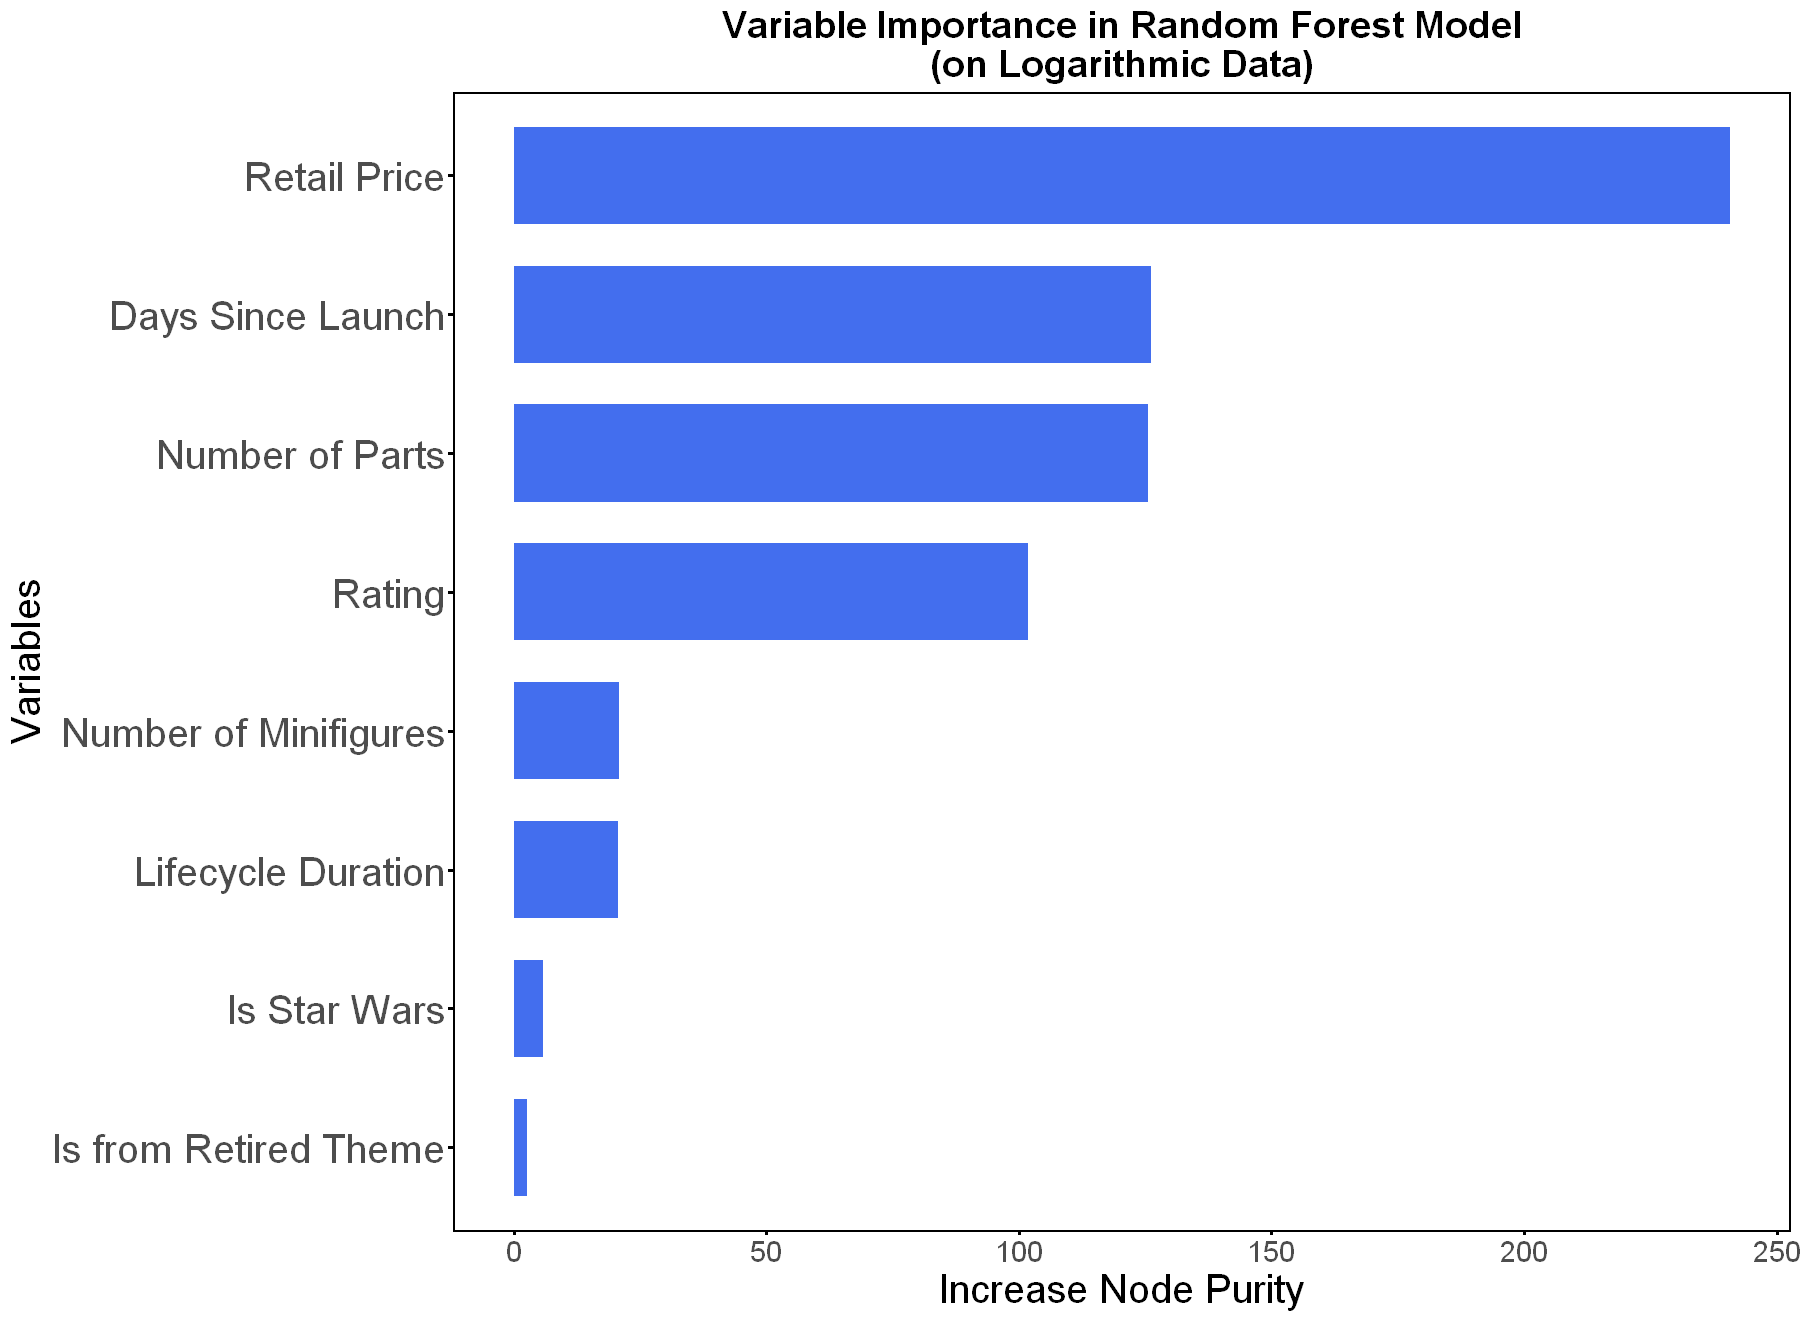

In [37]:
# Create the vasualisation for variable importance
log_variable_importance_plot1 <- 
  log_importance_df %>%
  ggplot(aes(x = reorder(Variable, Importance), y = Importance)) +
  geom_bar(stat = "identity", width = 0.7, fill = "royalblue2") +
  coord_flip() +  
  theme_minimal() +
  labs(title = "Variable Importance in Random Forest Model\n(on Logarithmic Data)",
       x = "Variables",
       y = "Increase Node Purity") +
   theme(text = element_text(size = 22),
        plot.title = element_text(hjust = 0.5, size = 22, face = "bold"),
        axis.title = element_text(size = 24),
        axis.text.y = element_text(size = 24),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
        axis.ticks = element_line(linewidth = 1))

log_variable_importance_plot1

In [39]:
# Save the plot above
ggsave("log_variable_importance_plot.jpg", plot = log_variable_importance_plot1, width = 16, height = 10, units = "in", dpi = 300)

### Build multipile regression model

In [232]:
# Train the Linear regression model using these four most important variables
lm_model_4 <- 
  lm(resale_price_new ~  retail_price  + parts_count + 
                         days_since_launch + rating , 
                         data = train_set)

summary(lm_model_4)


Call:
lm(formula = resale_price_new ~ retail_price + parts_count + 
    days_since_launch + rating, data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-751.82  -69.97   -7.19   38.30  889.14 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -7.975e+02  7.905e+01 -10.089  < 2e-16 ***
retail_price       1.757e+00  3.765e-01   4.665  3.8e-06 ***
parts_count        4.848e-02  4.261e-02   1.138    0.256    
days_since_launch  2.950e-02  2.363e-03  12.485  < 2e-16 ***
rating             1.842e+02  2.069e+01   8.906  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 139.9 on 603 degrees of freedom
Multiple R-squared:  0.6048,	Adjusted R-squared:  0.6022 
F-statistic: 230.7 on 4 and 603 DF,  p-value: < 2.2e-16


In [233]:
# Predict price using this model
lm_predictions_4 <- 
  predict(lm_model_4, test_set)

# Calculate RMSE
rmse_4 <- 
  rmse(test_set$resale_price_new, lm_predictions_4)

# Calculate R-square
rsq_4 <- 
  R2(lm_predictions_4, test_set$resale_price_new)

cat("RMSE on test set is: ", rmse_4, "\n")
cat("R-squared on test set is: ",rsq_4)

RMSE on test set is:  123.5482 
R-squared on test set is:  0.4629123

In [235]:
# Train the Linear Regression model adding a variable "minifigures_count"
lm_model_5 <- 
  lm(resale_price_new ~  retail_price  + parts_count + 
                         days_since_launch + rating +
                         lifecycle_duration, 
                         data = train_set)

summary(lm_model_5)


Call:
lm(formula = resale_price_new ~ retail_price + parts_count + 
    days_since_launch + rating + lifecycle_duration, data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-767.09  -66.96  -11.58   42.58  885.88 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -7.496e+02  7.821e+01  -9.584  < 2e-16 ***
retail_price        1.744e+00  3.696e-01   4.718 2.97e-06 ***
parts_count         7.252e-02  4.211e-02   1.722   0.0855 .  
days_since_launch   3.172e-02  2.363e-03  13.421  < 2e-16 ***
rating              1.841e+02  2.031e+01   9.066  < 2e-16 ***
lifecycle_duration -1.184e-01  2.422e-02  -4.889 1.30e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 137.4 on 602 degrees of freedom
Multiple R-squared:  0.6199,	Adjusted R-squared:  0.6168 
F-statistic: 196.4 on 5 and 602 DF,  p-value: < 2.2e-16


In [236]:
# Predict price using this model
lm_predictions_5 <- 
  predict(lm_model_5, test_set)

# Calculate RMSE
rmse_5 <- 
  rmse(test_set$resale_price_new, lm_predictions_5)

# Calculate R-square
rsq_5 <- 
  R2(lm_predictions_5, test_set$resale_price_new)

cat("RMSE on test set is: ", rmse_5, "\n")
cat("R-squared on test set is: ",rsq_5)

RMSE on test set is:  122.8769 
R-squared on test set is:  0.4726415

In [237]:
# Train the Linear Regression model adding a variable "lifecycle_duration"
lm_model_6 <- 
  lm(resale_price_new ~ retail_price + days_since_launch +
                        rating + parts_count + 
                        lifecycle_duration + minifigures_count,
                        data = train_set)

summary(lm_model_6)


Call:
lm(formula = resale_price_new ~ retail_price + days_since_launch + 
    rating + parts_count + lifecycle_duration + minifigures_count, 
    data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-661.71  -67.80  -11.25   43.28  905.74 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -7.202e+02  7.797e+01  -9.238  < 2e-16 ***
retail_price        1.633e+00  3.676e-01   4.441 1.07e-05 ***
days_since_launch   3.202e-02  2.344e-03  13.663  < 2e-16 ***
rating              1.703e+02  2.051e+01   8.301 6.82e-16 ***
parts_count         6.981e-02  4.174e-02   1.672 0.094954 .  
lifecycle_duration -1.178e-01  2.400e-02  -4.906 1.20e-06 ***
minifigures_count   7.702e+00  2.225e+00   3.462 0.000575 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 136.1 on 601 degrees of freedom
Multiple R-squared:  0.6274,	Adjusted R-squared:  0.6236 
F-statistic: 168.6 on 6 and 601 DF,  p-value: <

In [238]:
# Predict price using this model
lm_predictions_6 <- 
  predict(lm_model_6, test_set)

# Calculate RMSE
rmse_6 <- 
  rmse(test_set$resale_price_new, lm_predictions_6)

# Calculate R-square
rsq_6 <- 
  R2(lm_predictions_6, test_set$resale_price_new)

cat("RMSE on test set is: ", rmse_6, "\n")
cat("R-squared on test set is: ",rsq_6)

RMSE on test set is:  124.8129 
R-squared on test set is:  0.4647441

In [239]:
# Train the Linear Regression model adding a variable "is_starwars"
lm_model_7 <- 
  lm(resale_price_new ~ retail_price + days_since_launch +
                        rating + parts_count + 
                        minifigures_count + lifecycle_duration +
                        is_starwars, 
                        data = train_set)

summary(lm_model_7)


Call:
lm(formula = resale_price_new ~ retail_price + days_since_launch + 
    rating + parts_count + minifigures_count + lifecycle_duration + 
    is_starwars, data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-650.42  -66.40  -11.40   43.41  891.86 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -7.516e+02  8.146e+01  -9.226  < 2e-16 ***
retail_price        1.598e+00  3.684e-01   4.338 1.69e-05 ***
days_since_launch   3.392e-02  2.748e-03  12.342  < 2e-16 ***
rating              1.742e+02  2.072e+01   8.410 3.00e-16 ***
parts_count         7.286e-02  4.178e-02   1.744 0.081653 .  
minifigures_count   7.801e+00  2.225e+00   3.506 0.000488 ***
lifecycle_duration -1.243e-01  2.450e-02  -5.074 5.19e-07 ***
is_starwars1        1.790e+01  1.357e+01   1.319 0.187605    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 136 on 600 degrees of freedom
Multiple R-squared:  0.6284,	Ad

In [240]:
# Predict price using this model
lm_predictions_7 <- 
  predict(lm_model_7,test_set)

# Calculate RMSE
rmse_7 <- 
  rmse(test_set$resale_price_new, lm_predictions_7)

# Calculate R-square
rsq_7 <- 
  R2(lm_predictions_7, test_set$resale_price_new)

cat("RMSE on test set is: ", rmse_7, "\n")
cat("R-squared on test set is: ",rsq_7)

RMSE on test set is:  124.3363 
R-squared on test set is:  0.4687981

In [243]:
# Train Linear Regression model adding "is_from_retired_theme"
lm_model_8 <- 
  lm(resale_price_new ~ retail_price + days_since_launch +
                        rating + lifecycle_duration + minifigures_count + 
                     is_from_retired_theme, 
                        data = train_set)

summary(lm_model_8)


Call:
lm(formula = resale_price_new ~ retail_price + days_since_launch + 
    rating + lifecycle_duration + minifigures_count + is_from_retired_theme, 
    data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-729.21  -67.13  -14.27   44.92  884.85 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -783.88221   77.21448 -10.152  < 2e-16 ***
retail_price              2.18943    0.12145  18.028  < 2e-16 ***
days_since_launch         0.03432    0.00248  13.841  < 2e-16 ***
rating                  187.69911   20.37253   9.213  < 2e-16 ***
lifecycle_duration       -0.12079    0.02385  -5.065 5.43e-07 ***
minifigures_count         7.54914    2.21386   3.410 0.000693 ***
is_from_retired_theme1  -41.07108   13.47993  -3.047 0.002414 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 135.4 on 601 degrees of freedom
Multiple R-squared:  0.6313,	Adjusted R-squared:  0.6276 
F-sta

In [244]:
# Predict price using this model on test set
lm_predictions_8 <- 
  predict(lm_model_8, test_set)

# Calculate RMSE
final_lm_rmse_8 <- 
  rmse(test_set$resale_price_new, lm_predictions_8)

# Calculate R-square
final_lm_rsq_8 <- 
  R2(lm_predictions_8, test_set$resale_price_new)

cat("RMSE on test set is: ", final_lm_rmse_8, "\n")
cat("R-squared on test set is: ",final_lm_rsq_8 )

RMSE on test set is:  123.0159 
R-squared on test set is:  0.4830497

In [245]:
final_lm_model <- 
  lm(resale_price_new ~ retail_price + 
                        days_since_launch + rating +
                        lifecycle_duration + 
                        is_from_retired_theme,
                        data = train_set)

summary(final_lm_model)


Call:
lm(formula = resale_price_new ~ retail_price + days_since_launch + 
    rating + lifecycle_duration + is_from_retired_theme, data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-835.01  -70.47  -13.32   42.94  854.11 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -8.150e+02  7.735e+01 -10.537  < 2e-16 ***
retail_price            2.319e+00  1.163e-01  19.934  < 2e-16 ***
days_since_launch       3.411e-02  2.501e-03  13.640  < 2e-16 ***
rating                  2.019e+02  2.012e+01  10.033  < 2e-16 ***
lifecycle_duration     -1.216e-01  2.406e-02  -5.053 5.77e-07 ***
is_from_retired_theme1 -4.259e+01  1.359e+01  -3.134  0.00181 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 136.6 on 602 degrees of freedom
Multiple R-squared:  0.6242,	Adjusted R-squared:  0.6211 
F-statistic:   200 on 5 and 602 DF,  p-value: < 2.2e-16


In [246]:
# Predict price using final model on test set
lm_predictions <- 
  predict(final_lm_model, test_set)

# Calculate RMSE
final_lm_rmse <- 
  rmse(test_set$resale_price_new, lm_predictions)

# Calculate R-square
final_lm_rsq <- 
  R2(lm_predictions, test_set$resale_price_new)

cat("RMSE on test set is: ", final_lm_rmse, "\n")
cat("R-squared on test set is: ",final_lm_rsq, "\n" )

RMSE on test set is:  121.1514 
R-squared on test set is:  0.4904034 


In [247]:
lm_toal_test_predictions <- 
  predict(final_lm_model, theme_data_clean)

lm_total_actual_predict_data <-
  data.frame(actual = theme_data_clean$resale_price_new,
             predicted = lm_toal_test_predictions)

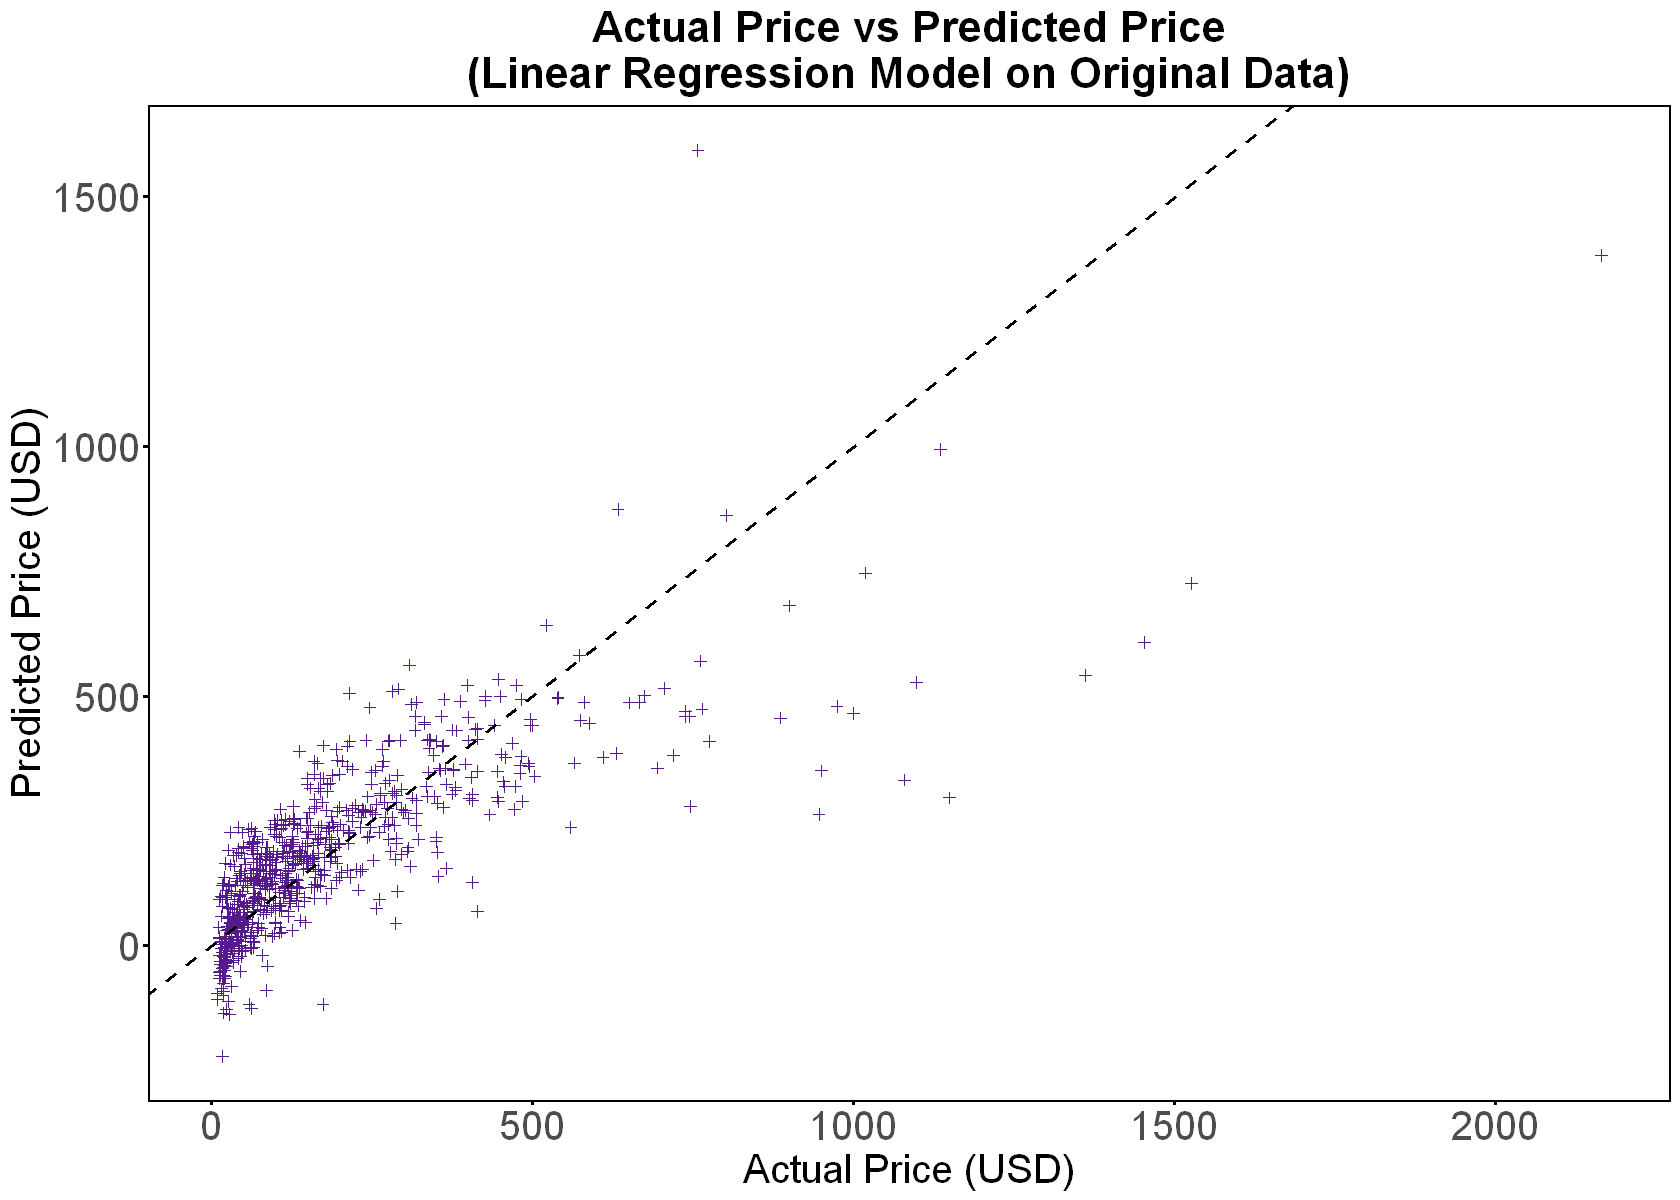

In [267]:
lm_actual_predicted_plot <- 
  lm_total_actual_predict_data %>%
  ggplot(aes(x = actual, y = predicted)) +
  geom_point(shape = 3, color = "purple4", size = 2) +
  labs(
    x = "Actual Price (USD)",
    y = "Predicted Price (USD)",
    title = "Actual Price vs Predicted Price\n(Linear Regression Model on Original Data)"
  ) +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "black", linewidth = 1) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 26, hjust = 0.5, face = "bold"),
    axis.title = element_text(size =24),
    axis.text = element_text(size = 24),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.grid.minor.y = element_blank(),
    axis.ticks = element_line(linewidth = 1),
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
    axis.line = element_line(colour = "black", linewidth = 0.5))

lm_actual_predicted_plot

In [268]:
# Save the plot above
ggsave("lm_actual_predicted_plot.jpg", plot = lm_actual_predicted_plot, width = 13, height = 9, units = "in", dpi = 300)

### Build Linear Regression on Logarithmic Data

In [249]:
# Train Linear Regression using these base four data
log_lm_model_4 <- 
  lm(resale_price_new ~ retail_price + days_since_launch + 
                        parts_count + rating ,
                        data = train_set_log)

summary(log_lm_model_4)


Call:
lm(formula = resale_price_new ~ retail_price + days_since_launch + 
    parts_count + rating, data = train_set_log)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.22998 -0.30606  0.01991  0.29384  1.77798 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -7.05290    0.32872 -21.455   <2e-16 ***
retail_price       0.67731    0.07891   8.583   <2e-16 ***
days_since_launch  0.78196    0.02917  26.806   <2e-16 ***
parts_count        0.05660    0.07678   0.737    0.461    
rating             0.66374    0.07239   9.170   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4445 on 603 degrees of freedom
Multiple R-squared:  0.8186,	Adjusted R-squared:  0.8174 
F-statistic: 680.4 on 4 and 603 DF,  p-value: < 2.2e-16


In [250]:
# Predict price using this model on test set
log_lm_predictions_4 <- 
    predict(log_lm_model_4, test_set_log) %>%
    exp()

# Calculate RMSE
log_lm_rmse_4 <- 
  rmse(exp(test_set_log$resale_price_new), log_lm_predictions_4)

# Calculate R-square
log_lm_rsq_4 <- 
  R2(log_lm_predictions_4, exp(test_set_log$resale_price_new))

cat("RMSE on test set is: ", log_lm_rmse_4, "\n")
cat("R-squared on test set is: ",log_lm_rsq_4 )

RMSE on test set is:  115.2868 
R-squared on test set is:  0.5325953

In [251]:
# Train Linear Regression adding lifecycle_duration
log_lm_model_5 <- 
  lm(resale_price_new ~ retail_price + days_since_launch + rating +
                        parts_count + minifigures_count,
                        data = train_set_log)
""
summary(log_lm_model_5)

[1] ""


Call:
lm(formula = resale_price_new ~ retail_price + days_since_launch + 
    rating + parts_count + minifigures_count, data = train_set_log)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.20228 -0.30603  0.00804  0.28956  1.77252 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -7.05582    0.32846 -21.482  < 2e-16 ***
retail_price       0.64603    0.08190   7.888 1.45e-14 ***
days_since_launch  0.77964    0.02919  26.706  < 2e-16 ***
rating             0.65639    0.07251   9.052  < 2e-16 ***
parts_count        0.06801    0.07714   0.882    0.378    
minifigures_count  0.06456    0.04569   1.413    0.158    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4441 on 602 degrees of freedom
Multiple R-squared:  0.8192,	Adjusted R-squared:  0.8177 
F-statistic: 545.6 on 5 and 602 DF,  p-value: < 2.2e-16


In [252]:
# Predict price on test set using this model
log_lm_predictions_5 <- 
    predict(log_lm_model_5, test_set_log) %>%
    exp()

# Calculate RMSE
log_lm_rmse_5 <- 
  rmse(exp(test_set_log$resale_price_new), log_lm_predictions_5)

# Calculate R-square
log_lm_rsq_5 <- 
  R2(log_lm_predictions_5, exp(test_set_log$resale_price_new))

cat("RMSE on test set is: ", log_lm_rmse_5, "\n")
cat("R-squared on test set is: ",log_lm_rsq_5 )

RMSE on test set is:  116.0763 
R-squared on test set is:  0.5264034

In [253]:
# Train Linear Regression adding minifigures count
log_lm_model_6 <- 
  lm(resale_price_new ~ retail_price + days_since_launch + parts_count +
                        rating + minifigures_count + lifecycle_duration,
                        data = train_set_log)

summary(log_lm_model_6)


Call:
lm(formula = resale_price_new ~ retail_price + days_since_launch + 
    parts_count + rating + minifigures_count + lifecycle_duration, 
    data = train_set_log)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.13743 -0.30704  0.00582  0.28487  1.72303 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -6.31054    0.36470 -17.303  < 2e-16 ***
retail_price        0.64932    0.08067   8.050 4.46e-15 ***
days_since_launch   0.79878    0.02908  27.472  < 2e-16 ***
parts_count         0.08727    0.07610   1.147    0.252    
rating              0.66987    0.07148   9.371  < 2e-16 ***
minifigures_count   0.04608    0.04519   1.020    0.308    
lifecycle_duration -0.16788    0.03793  -4.426 1.14e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4374 on 601 degrees of freedom
Multiple R-squared:  0.8249,	Adjusted R-squared:  0.8232 
F-statistic:   472 on 6 and 601 DF,  p-value: < 

In [254]:
# Predict price using this model on test set
log_lm_predictions_6 <- 
    predict(log_lm_model_6, test_set_log) %>%
    exp()

# Calculate RMSE
log_lm_rmse_6 <- 
  rmse(exp(test_set_log$resale_price_new), log_lm_predictions_6)

# Calculate R-square
log_lm_rsq_6 <- 
  R2(log_lm_predictions_6, exp(test_set_log$resale_price_new))

cat("RMSE on test set is: ", log_lm_rmse_6, "\n")
cat("R-squared on test set is: ",log_lm_rsq_6 )

RMSE on test set is:  112.7937 
R-squared on test set is:  0.5510987

In [255]:
# Train Linear Regression model adding is from star wars
log_lm_model_7 <- 
  lm(resale_price_new ~ retail_price + days_since_launch +
                        parts_count + rating + 
                        minifigures_count + lifecycle_duration +
                        is_starwars,
                        data = train_set_log)

summary(log_lm_model_7)


Call:
lm(formula = resale_price_new ~ retail_price + days_since_launch + 
    parts_count + rating + minifigures_count + lifecycle_duration + 
    is_starwars, data = train_set_log)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.17845 -0.30625  0.01303  0.28233  1.69724 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -5.95246    0.39112 -15.219  < 2e-16 ***
retail_price        0.66319    0.08052   8.236 1.12e-15 ***
days_since_launch   0.76275    0.03243  23.518  < 2e-16 ***
parts_count         0.08375    0.07579   1.105 0.269618    
rating              0.63744    0.07239   8.806  < 2e-16 ***
minifigures_count   0.03905    0.04509   0.866 0.386893    
lifecycle_duration -0.14967    0.03849  -3.889 0.000112 ***
is_starwars1       -0.10552    0.04279  -2.466 0.013944 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4356 on 600 degrees of freedom
Multiple R-squared:  0.8267,	Adj

In [256]:
# Predict price using this model on test set
log_lm_predictions_7 <- 
    predict(log_lm_model_7, test_set_log) %>%
    exp()

# Calculate RMSE
log_lm_rmse_7 <- 
  rmse(exp(test_set_log$resale_price_new), log_lm_predictions_7)

# Calculate R-square
log_lm_rsq_7 <- 
  R2(log_lm_predictions_7, exp(test_set_log$resale_price_new))

cat("RMSE on test set is: ", log_lm_rmse_7, "\n")
cat("R-squared on test set is: ",log_lm_rsq_7 )

RMSE on test set is:  115.0411 
R-squared on test set is:  0.5344288

In [257]:
# Train Linear Regression model adding is from retired theme
log_lm_model_8 <- 
  lm(resale_price_new ~ retail_price + days_since_launch + 
                        parts_count + rating +
                        minifigures_count +  lifecycle_duration +
                        is_starwars + is_from_retired_theme,
                        data = train_set_log)

summary(log_lm_model_8)


Call:
lm(formula = resale_price_new ~ retail_price + days_since_launch + 
    parts_count + rating + minifigures_count + lifecycle_duration + 
    is_starwars + is_from_retired_theme, data = train_set_log)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.13022 -0.30995  0.00255  0.28783  1.74724 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -5.94339    0.38964 -15.253  < 2e-16 ***
retail_price            0.65127    0.08037   8.103 3.02e-15 ***
days_since_launch       0.76092    0.03232  23.545  < 2e-16 ***
parts_count             0.09562    0.07567   1.264 0.206842    
rating                  0.65079    0.07233   8.998  < 2e-16 ***
minifigures_count       0.02957    0.04510   0.656 0.512342    
lifecycle_duration     -0.14493    0.03839  -3.775 0.000176 ***
is_starwars1           -0.19388    0.05661  -3.425 0.000657 ***
is_from_retired_theme1 -0.13543    0.05709  -2.372 0.017997 *  
---
Signif. codes:  0 '***' 0.001 

In [258]:
# Predict price on test set
log_lm_predictions_8 <- 
    predict(log_lm_model_8, test_set_log) %>%
    exp()

# Calculate RMSE
log_lm_rmse_8 <- 
  rmse(exp(test_set_log$resale_price_new), log_lm_predictions_8)

# Calculate R-square
log_lm_rsq_8 <- 
  R2(log_lm_predictions_8, exp( test_set_log$resale_price_new))

cat("RMSE on test set is: ", log_lm_rmse_8, "\n")
cat("R-squared on test set is: ",log_lm_rsq_8 )

RMSE on test set is:  114.771 
R-squared on test set is:  0.5385408

In [259]:
# Train Linear Regression model adding is from retired theme
log_lm_model_final <- 
  lm(resale_price_new ~ retail_price + rating + 
                        days_since_launch + lifecycle_duration,
                        data = train_set_log)

summary(log_lm_model_final)


Call:
lm(formula = resale_price_new ~ retail_price + rating + days_since_launch + 
    lifecycle_duration, data = train_set_log)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.17576 -0.31011  0.00619  0.29064  1.74253 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -6.18103    0.34851 -17.736  < 2e-16 ***
retail_price        0.74941    0.02330  32.167  < 2e-16 ***
rating              0.68784    0.07029   9.785  < 2e-16 ***
days_since_launch   0.80072    0.02901  27.602  < 2e-16 ***
lifecycle_duration -0.16880    0.03769  -4.479 8.98e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4375 on 603 degrees of freedom
Multiple R-squared:  0.8243,	Adjusted R-squared:  0.8231 
F-statistic: 707.3 on 4 and 603 DF,  p-value: < 2.2e-16


In [260]:
# Predict price on test set
log_lm_predictions <- 
    predict(log_lm_model_final, test_set_log) %>%
    exp()

# Calculate RMSE
log_lm_rmse <- 
  rmse(exp(test_set_log$resale_price_new), log_lm_predictions)

# Calculate R-square
log_lm_rsq <- 
  R2(log_lm_predictions, exp(test_set_log$resale_price_new))

# Calculate Correlation Coefficient
log_lm_r <-
  cor(log_lm_predictions, exp(test_set_log$resale_price_new))

cat("RMSE on test set is: ", log_lm_rmse, "\n")
cat("R-squared on test set is: ",log_lm_rsq, "\n" )
cat("Correlation coefficient on test set is: ",log_lm_r )

RMSE on test set is:  112.2909 
R-squared on test set is:  0.555253 
Correlation coefficient on test set is:  0.745153

In [261]:
# Predict price using the final model
log_lm_toal_test_predictions <- 
  predict(log_lm_model_final, theme_data_log_clean) %>%
  exp()

log_lm_total_actual_predict_data <-
  data.frame(actual = exp(theme_data_log_clean$resale_price_new),
             predicted = log_lm_toal_test_predictions)

In [262]:
# Check the statistics of actual and predicted price
summary(log_lm_total_actual_predict_data)

     actual          predicted       
 Min.   :   9.65   Min.   :   5.735  
 1st Qu.:  52.26   1st Qu.:  55.905  
 Median : 115.73   Median : 110.303  
 Mean   : 182.98   Mean   : 167.211  
 3rd Qu.: 235.16   3rd Qu.: 214.421  
 Max.   :2165.01   Max.   :1776.632  

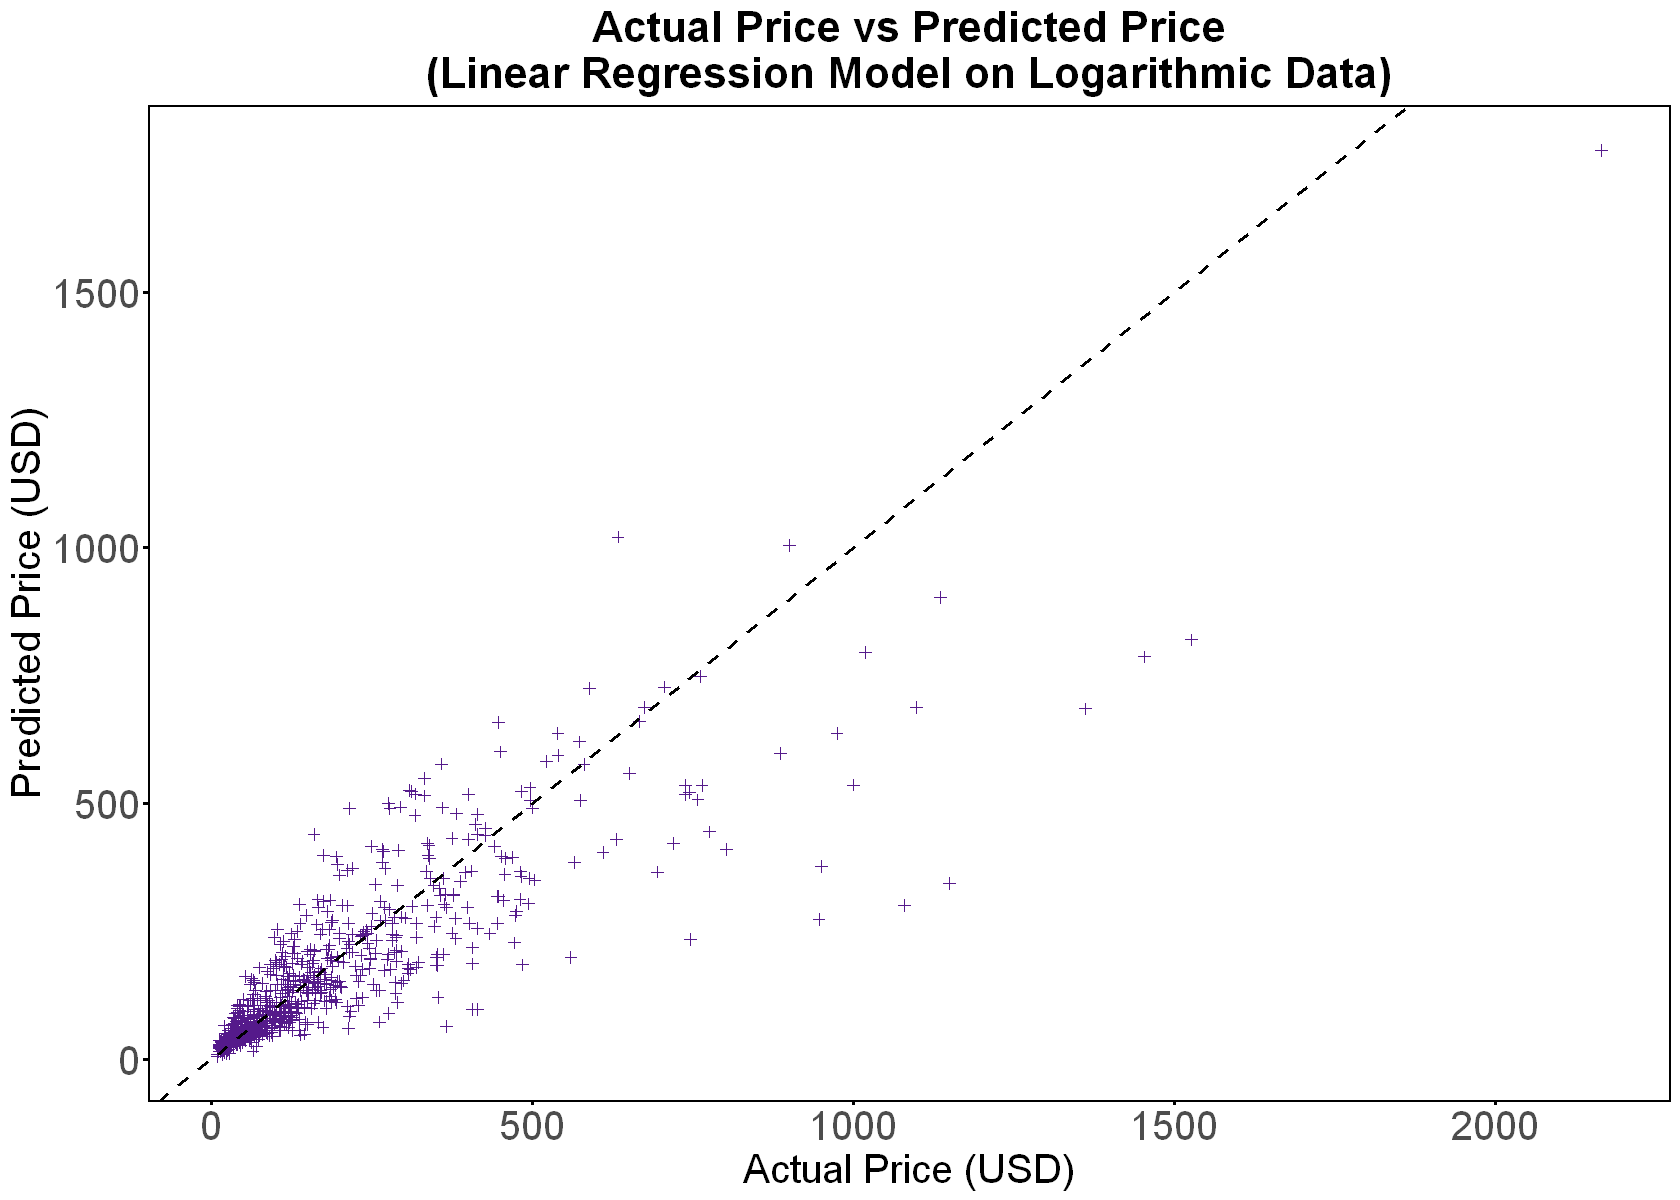

In [269]:
# Create a scatter plot for actual and predicted price
log_lm_actual_predicted_plot <- 
  log_lm_total_actual_predict_data %>%
  ggplot(aes(x = actual, y = predicted)) +
  geom_point(shape = 3, color = "purple4", size = 2) +
  labs(
    x = "Actual Price (USD)",
    y = "Predicted Price (USD)",
    title = "Actual Price vs Predicted Price\n(Linear Regression Model on Logarithmic Data)"
  ) +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "black", linewidth = 1) + 
  theme_minimal() +
  theme(
    plot.title = element_text(size = 26, hjust = 0.5, face = "bold"),
    axis.title = element_text(size =24),
    axis.text = element_text(size = 24),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.grid.minor.y = element_blank(),
    axis.ticks = element_line(linewidth = 1),
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
    axis.line = element_line(colour = "black", linewidth = 0.5))

log_lm_actual_predicted_plot

In [272]:
# Save the plot above
ggsave("log_lm_actual_predicted_plot.jpg", plot = log_lm_actual_predicted_plot, width = 13, height = 9, units = "in", dpi = 300)